In [625]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hppbtae/sample_submission.csv
/kaggle/input/hppbtae/data_description.txt
/kaggle/input/hppbtae/train.csv
/kaggle/input/hppbtae/test.csv
/kaggle/input/final0/sample_submission.csv


# Loading Data

In [626]:
train_df=pd.read_csv("/kaggle/input/hppbtae/train.csv")  #train file
test_df=pd.read_csv("/kaggle/input/hppbtae/test.csv")  #test file

In [627]:
print ("The shape of the train data is (row, column):"+ str(train_df.shape))
print (train_df.info())
print('_'*100)
print ("The shape of the test data is (row, column):"+ str(test_df.shape))
print (test_df.info())

The shape of the train data is (row, column):(934, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             934 non-null    int64  
 1   MSSubClass     934 non-null    int64  
 2   MSZoning       934 non-null    object 
 3   LotFrontage    771 non-null    float64
 4   LotArea        934 non-null    int64  
 5   Street         934 non-null    object 
 6   Alley          56 non-null     object 
 7   LotShape       934 non-null    object 
 8   LandContour    934 non-null    object 
 9   Utilities      934 non-null    object 
 10  LotConfig      934 non-null    object 
 11  LandSlope      934 non-null    object 
 12  Neighborhood   934 non-null    object 
 13  Condition1     934 non-null    object 
 14  Condition2     934 non-null    object 
 15  BldgType       934 non-null    object 
 16  HouseStyle     934 non-null    object 
 17 

In [628]:
train_df['source']='train'
test_df['source']='test'
data = pd.concat([train_df, test_df],ignore_index=True)

In [629]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,142,20,RL,78.0,11645,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2006,WD,Normal,260000.0,train
1,365,60,RL,NaN,18800,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,190000.0,train
2,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,New,Partial,485000.0,train
3,976,160,FV,NaN,2651,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Normal,165000.0,train
4,1158,120,RL,34.0,5001,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,WD,Normal,230000.0,train


In [630]:
np.array(data.isnull().sum())

array([   0,    0,    0,  202,    0,    0, 1097,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    6,    6,    0,    0,    0,   32,   32,   32,
         32,    0,   33,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  546,   69,   69,   69,    0,    0,   69,   69,    0,
          0,    0,    0,    0,    0,    0, 1163,  942, 1124,    0,    0,
          0,    0,    0,  234,    0])

we found the percent of missing value to remove the feature from the following reference :

- Fichman, M., & Cummings, J. N. (2003). Multiple imputation for missing data: Making the most of what you know. Organizational Research Methods, 6(3), 282-308.

- https://www.kaggle.com/questions-and-answers/168308

In [631]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)


,Total,Percent
PoolQC,1163,0.995719
MiscFeature,1124,0.962329
Alley,1097,0.939212
Fence,942,0.806507
FireplaceQu,546,0.467466
SalePrice,234,0.200342
LotFrontage,202,0.172945
GarageYrBlt,69,0.059075
GarageType,69,0.059075
GarageCond,69,0.059075


#### Theoretically, 25 to 30% is the missing values range to be considered for imputation, beyond which we might want to drop the variable from analysis.If the information contained in the variable is significant , we can consider imputation upto 50% missing values.

#### I will drop the following featuers they have more than 40% of missing data
- PoolQC : Pool quality 
- MiscFeature : Miscellaneous feature not covered in other categories
- Alley : Type of alley access to property
- Fence : Fence quality
- FireplaceQu : Fireplace quality

<AxesSubplot:>

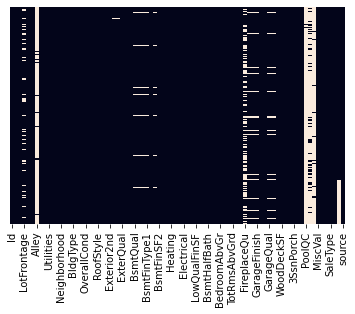

In [632]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [633]:
data = data.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1)

<AxesSubplot:>

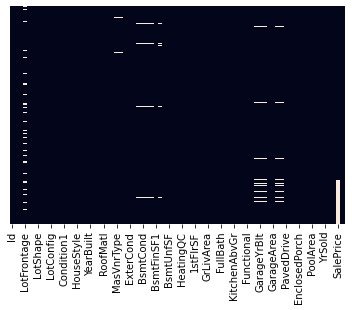

In [634]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

##### LotFrontage : Linear feet of street connected to property
###### we will using mean value.

In [635]:
data["LotFrontage"].isnull().sum()

202

In [636]:
data["LotFrontage"].head()

0     78.0
1      NaN
2    104.0
3      NaN
4     34.0
Name: LotFrontage, dtype: float64

In [637]:
data["LotFrontage"]=data["LotFrontage"].fillna(data["LotFrontage"].mean())
#mean value : 69.876812

In [638]:
data["LotFrontage"].head()

0     78.000000
1     69.876812
2    104.000000
3     69.876812
4     34.000000
Name: LotFrontage, dtype: float64

##### GarageYrBlt: Year garage was built
###### we will try solve the misiing value depend on saleprice valye

In [639]:
data["GarageYrBlt"].isnull().sum()

69

In [640]:
data["GarageYrBlt"].head()

0    2005.0
1    1976.0
2    2009.0
3    2000.0
4    2008.0
Name: GarageYrBlt, dtype: float64

In [641]:
max_in_GarageYrBlt=np.array(data["GarageYrBlt"].value_counts())[0]

In [642]:
data["GarageYrBlt"]=data["GarageYrBlt"].fillna(max_in_GarageYrBlt)

In [643]:
data["GarageYrBlt"].isnull().sum()

0

##### GarageType : Garage location

In [644]:
data["GarageType"].isnull().sum()

69

In [645]:
max_in_GarageType=np.array(data["GarageType"].value_counts())[0]

In [646]:
data["GarageType"]=data["GarageType"].fillna(max_in_GarageType)

In [647]:
data["GarageType"].isnull().sum()

0

##### GarageCond : Garage condition

In [648]:
data["GarageCond"].isnull().sum()

69

In [649]:
max_in_GarageCond=np.array(data["GarageCond"].value_counts())[0]

In [650]:
data["GarageCond"]=data["GarageCond"].fillna(max_in_GarageCond)

In [651]:
data["GarageCond"].isnull().sum()

0

##### GarageFinish:Interior finish of the garage


In [652]:
data["GarageFinish"].isnull().sum()

69

In [653]:
max_in_GarageFinish=np.array(data["GarageFinish"].value_counts())[0]

In [654]:
data["GarageFinish"]=data["GarageFinish"].fillna(max_in_GarageFinish)

In [655]:
data["GarageFinish"].isnull().sum()

0

##### GarageQual : Garage quality

In [656]:
data["GarageQual"].isnull().sum()

69

In [657]:
max_in_GarageQual=np.array(data["GarageQual"].value_counts())[0]

In [658]:
data["GarageQual"]=data["GarageQual"].fillna(max_in_GarageQual)

In [659]:
data["GarageFinish"].isnull().sum()

0

##### BsmtFinType2 : Rating of basement finished area (if multiple types)

In [660]:
data["BsmtFinType2"].isnull().sum()

33

In [661]:
max_in_BsmtFinType2=np.array(data["BsmtFinType2"].value_counts())[0]

In [662]:
data["BsmtFinType2"]=data["BsmtFinType2"].fillna(max_in_BsmtFinType2)

In [663]:
data["BsmtFinType2"].isnull().sum()

0

##### BsmtCond :  Evaluates the general condition of the basement

In [664]:
max_in_BsmtCond=np.array(data["BsmtCond"].value_counts())[0]

In [665]:
data["BsmtCond"]=data["BsmtCond"].fillna(max_in_BsmtCond)

In [666]:
data["BsmtCond"].isnull().sum()

0

##### BsmtExposure : Refers to walkout or garden level walls

In [667]:
data["BsmtExposure"].isnull().sum()

32

In [668]:
max_in_BsmtExposure=np.array(data["BsmtExposure"].value_counts())[0]

In [669]:
data["BsmtExposure"]=data["BsmtExposure"].fillna(max_in_BsmtExposure)

In [670]:
data["BsmtExposure"].isnull().sum()

0

##### BsmtQual : Evaluates the height of the basement

In [671]:
data["BsmtQual"].isnull().sum()

32

In [672]:
max_in_BsmtQual=np.array(data["BsmtQual"].value_counts())[0]

In [673]:
data["BsmtQual"]=data["BsmtQual"].fillna(max_in_BsmtQual)

In [674]:
data["BsmtQual"].isnull().sum()

0

##### BsmtFinType1 : Rating of basement finished area

In [675]:
data["BsmtFinType1"].isnull().sum()

32

In [676]:
max_in_BsmtFinType1=np.array(data["BsmtFinType1"].value_counts())[0]

In [677]:
data["BsmtFinType1"]=data["BsmtFinType1"].fillna(max_in_BsmtFinType1)

In [678]:
data["BsmtFinType1"].isnull().sum()

0

##### MasVnrArea : Masonry veneer area in square feet

In [679]:
data["MasVnrArea"].isnull().sum()

6

In [680]:
data["MasVnrArea"].head()

0      0.0
1    120.0
2    860.0
3      0.0
4    166.0
Name: MasVnrArea, dtype: float64

In [681]:
data["MasVnrArea"]=data["MasVnrArea"].fillna(data["MasVnrArea"].mean())

In [682]:
data["MasVnrArea"].isnull().sum()

0

##### MasVnrType : Masonry veneer type

In [683]:
data["MasVnrType"].isnull().sum()

6

In [684]:
max_in_MasVnrType=np.array(data["MasVnrType"].value_counts())[0]

In [685]:
data["MasVnrType"]=data["MasVnrType"].fillna(max_in_MasVnrType)

In [686]:
data["MasVnrType"].isnull().sum()

0

##### Electrical : Electrical system

In [687]:
data["Electrical"].isnull().sum()

1

In [688]:
max_in_Electrical=np.array(data["Electrical"].value_counts())[0]

In [689]:
data["Electrical"]=data["Electrical"].fillna(max_in_Electrical)

In [690]:
data["Electrical"].isnull().sum()

0

In [691]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)


,Total,Percent
SalePrice,234,0.200342
Id,0,0.000000
FullBath,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000
BedroomAbvGr,0,0.000000
HalfBath,0,0.000000


In [692]:
data=data.drop("Id",axis=1)

# Handel outliers

# EDA

In [693]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [694]:
df_num = data.select_dtypes(include=['number'])
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,934.000000
mean,57.375856,69.876812,10529.335616,6.100171,5.575342,1971.960616,1985.496575,104.122203,449.238014,44.054795,...,98.566781,47.887842,20.954623,4.118151,13.825342,2.449486,48.681507,6.313356,2007.815068,182981.457173
std,43.522414,22.855950,10734.611698,1.392623,1.119803,30.113498,20.460717,179.556391,464.193569,155.813680,...,127.081601,67.992642,59.988335,32.372083,52.857153,37.828606,548.727100,2.695216,1.336347,80613.726628
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132000.000000
50%,50.000000,69.876812,9525.000000,6.000000,5.000000,1974.000000,1994.500000,0.000000,385.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165075.000000
75%,70.000000,78.000000,11608.500000,7.000000,6.000000,2001.000000,2004.000000,166.250000,719.250000,0.000000,...,171.250000,69.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1127.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [695]:
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [696]:
data.describe(exclude="number")

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,source
count,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,...,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,7,4,6,6,3,9,6,2
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,train
freq,927,1164,731,1059,1167,827,1115,185,1008,1156,...,578,1090,698,473,1044,1056,1078,1015,963,934


## Univariate Plots

In [697]:
data["MSSubClass"]=data["MSSubClass"].replace({20:"1-STORY 1946 & NEWER ALL STYLES",
                                              30:"1-STORY 1945 & OLDER",
                                              40:"1-STORY W/FINISHED ATTIC ALL AGES",
                                              45:"1-1/2 STORY - UNFINISHED ALL AGES",
                                              50:"1-1/2 STORY FINISHED ALL AGES",
                                              60:"2-STORY 1946 & NEWER",
                                              70:"2-STORY 1945 & OLDER",
                                              75:"2-1/2 STORY ALL AGES",
                                              80:"SPLIT OR MULTI-LEVEL",
                                              85:"SPLIT FOYER",
                                              90:"DUPLEX - ALL STYLES AND AGES",
                                              120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
                                              150:"1-1/2 STORY PUD - ALL AGES",
                                              160:"2-STORY PUD - 1946 & NEWER",
                                              180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                                              190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"})

In [698]:
data["MSSubClass"].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          439
2-STORY 1946 & NEWER                                     232
1-1/2 STORY FINISHED ALL AGES                            112
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     70
2-STORY PUD - 1946 & NEWER                                56
1-STORY 1945 & OLDER                                      53
SPLIT OR MULTI-LEVEL                                      50
2-STORY 1945 & OLDER                                      45
DUPLEX - ALL STYLES AND AGES                              38
2 FAMILY CONVERSION - ALL STYLES AND AGES                 27
SPLIT FOYER                                               15
2-1/2 STORY ALL AGES                                      11
1-1/2 STORY - UNFINISHED ALL AGES                          9
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                    8
1-STORY W/FINISHED ATTIC ALL AGES                          3
Name: MSSubClass, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


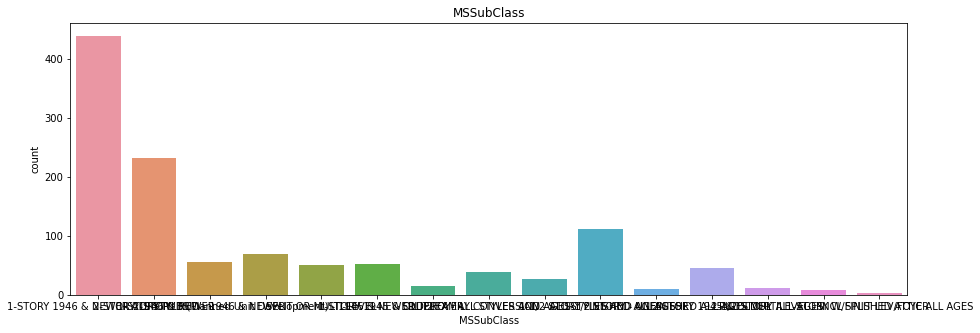

In [699]:
f,ax=plt.subplots(figsize=(15,5))
ax.set_ylabel('')
sns.countplot('MSSubClass',data=data)
ax.set_title('MSSubClass')
plt.show()

#### the most house identifies the type of dwelling involved in the sale is : 1-STORY 1946 & NEWER ALL STYLES

In [700]:
data["LotFrontage"]

0        78.000000
1        69.876812
2       104.000000
3        69.876812
4        34.000000
           ...    
1163     93.000000
1164     60.000000
1165     69.000000
1166     76.000000
1167     41.000000
Name: LotFrontage, Length: 1168, dtype: float64

<AxesSubplot:title={'center':'LotFrontage'}, xlabel='LotFrontage', ylabel='Count'>

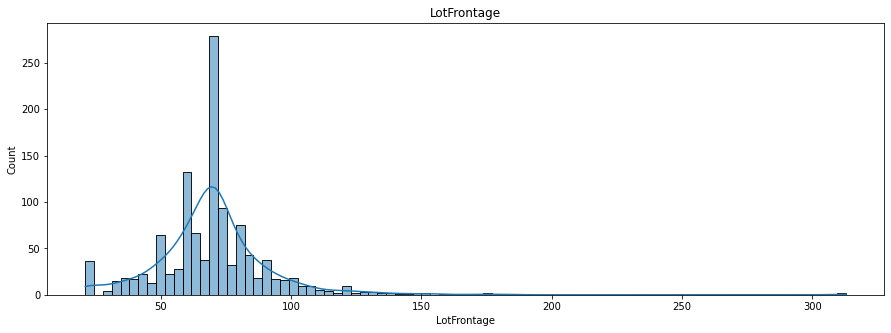

In [701]:
f,ax=plt.subplots(figsize=(15,5))
ax.set_title('LotFrontage')
sns.histplot(data=data, x="LotFrontage", kde=True)


#### the avg of Linear feet of street connected to property is around 70

In [702]:
data["LotArea"]

0       11645
1       18800
2       13518
3        2651
4        5001
        ...  
1163     9382
1164     9600
1165     9337
1166     9880
1167     4923
Name: LotArea, Length: 1168, dtype: int64

<AxesSubplot:title={'center':'LotArea'}, xlabel='LotArea', ylabel='Count'>

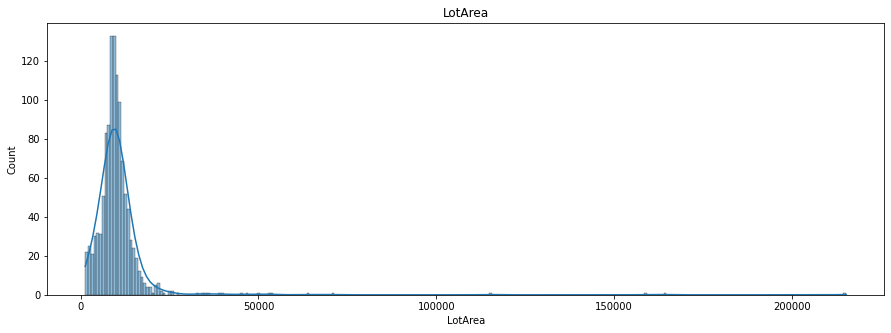

In [703]:
f,ax=plt.subplots(figsize=(15,5))
ax.set_title('LotArea')
sns.histplot(data=data, x="LotArea", kde=True)


#### the avg of Lot size in square feet is around 10500

In [704]:
data["OverallQual"]

0       7
1       6
2       9
3       7
4       7
       ..
1163    7
1164    5
1165    6
1166    6
1167    8
Name: OverallQual, Length: 1168, dtype: int64

'\n 10\tVery Excellent\n       9\tExcellent\n       8\tVery Good\n       7\tGood\n       6\tAbove Average\n       5\tAverage\n       4\tBelow Average\n       3\tFair\n       2\tPoor\n       1\tVery Poor\n       '

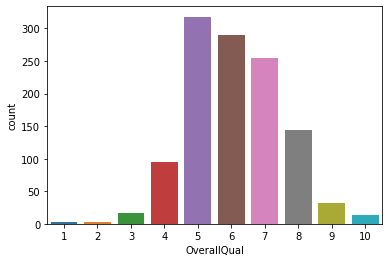

In [705]:
sns.countplot(x=data["OverallQual"])
"""
 10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       """

#### we found that the Rates the overall material is average (5)

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

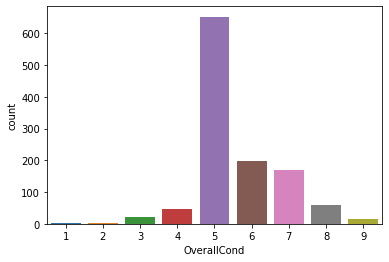

In [706]:
data["OverallCond"]
sns.countplot(x=data["OverallCond"])

#### we found that the Rates the overall condition is average(5)

In [707]:
data["YearBuilt"].value_counts()

2005    52
2006    50
2004    46
2007    45
2003    35
        ..
1898     1
1905     1
1913     1
1906     1
1893     1
Name: YearBuilt, Length: 109, dtype: int64

#### we found that the large number of houses ware bulit in 2005

In [708]:
data["YearRemodAdd"].value_counts()

1950    134
2006     78
2007     64
2005     62
2004     50
       ... 
1952      4
1981      4
2010      4
1951      3
1986      3
Name: YearRemodAdd, Length: 61, dtype: int64

In [709]:
data["RemorAdd"]=data["YearRemodAdd"]-data["YearBuilt"]# featuer eng

In [710]:
def RemorAdd_TF(x):
    if x == 0:
        return "No"
    else:
        return "Yes"
    
data["RemorAdd"]=data["RemorAdd"].apply(lambda x:RemorAdd_TF(x))

In [711]:
data["RemorAdd"]# if the house has addition or remodeling the value will be Yes else No

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
1163    Yes
1164    Yes
1165     No
1166     No
1167    Yes
Name: RemorAdd, Length: 1168, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


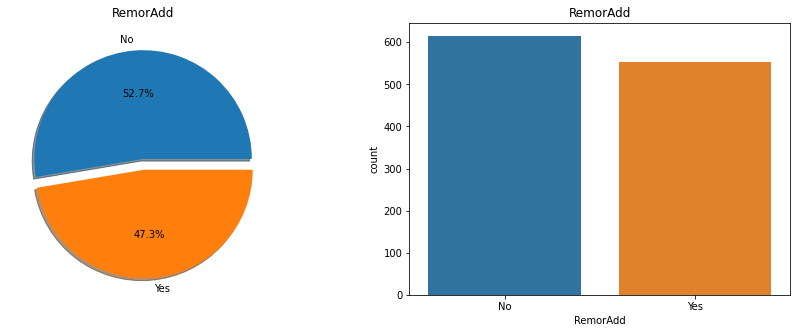

In [712]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['RemorAdd'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('RemorAdd')
ax[0].set_ylabel('')
sns.countplot('RemorAdd',data=data,ax=ax[1])
ax[1].set_title('RemorAdd')
plt.show()

#### we found that the houses which have no change more than the hoses which have change

In [713]:
data["MasVnrArea"]#Masonry veneer area in square feet

0         0.0
1       120.0
2       860.0
3         0.0
4       166.0
        ...  
1163    125.0
1164      0.0
1165      0.0
1166      0.0
1167      0.0
Name: MasVnrArea, Length: 1168, dtype: float64

<AxesSubplot:title={'center':'MasVnrArea'}, xlabel='MasVnrArea', ylabel='Count'>

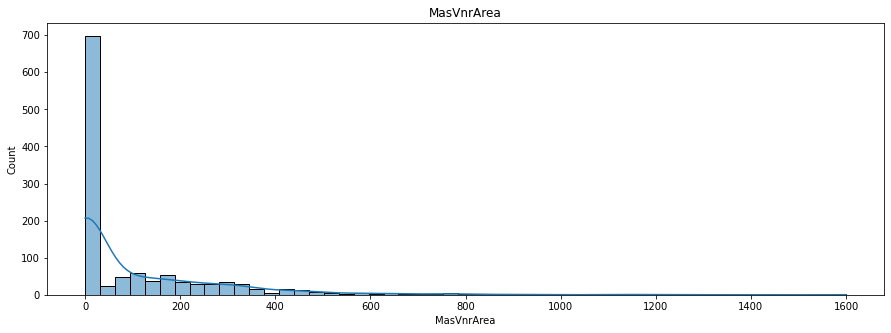

In [714]:
f,ax=plt.subplots(figsize=(15,5))
ax.set_title('MasVnrArea')
sns.histplot(data=data, x="MasVnrArea", kde=True)


In [715]:
data["MasVnrArea"].value_counts()

0.000000      681
108.000000      8
180.000000      8
72.000000       7
104.122203      6
             ... 
760.000000      1
60.000000       1
399.000000      1
459.000000      1
788.000000      1
Name: MasVnrArea, Length: 286, dtype: int64

In [716]:
def MASVNR(x):
    if x == 0:
        return "No"
    else:
        return "Yes"
data["HaveVnr"]=data["MasVnrArea"].apply(lambda x:MASVNR(x))

In [717]:
data["HaveVnr"]

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
1163    Yes
1164     No
1165     No
1166     No
1167     No
Name: HaveVnr, Length: 1168, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


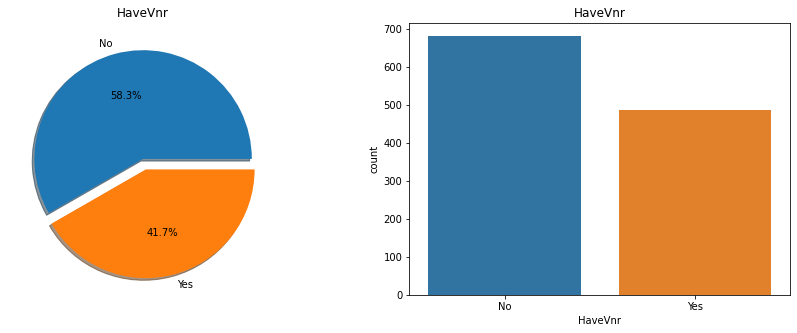

In [718]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['HaveVnr'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('HaveVnr')
ax[0].set_ylabel('')
sns.countplot('HaveVnr',data=data,ax=ax[1])
ax[1].set_title('HaveVnr')
plt.show()

#### We found that the most houses aren't have veneer

<AxesSubplot:title={'center':'BsmtFinSF1'}, xlabel='BsmtFinSF1', ylabel='Count'>

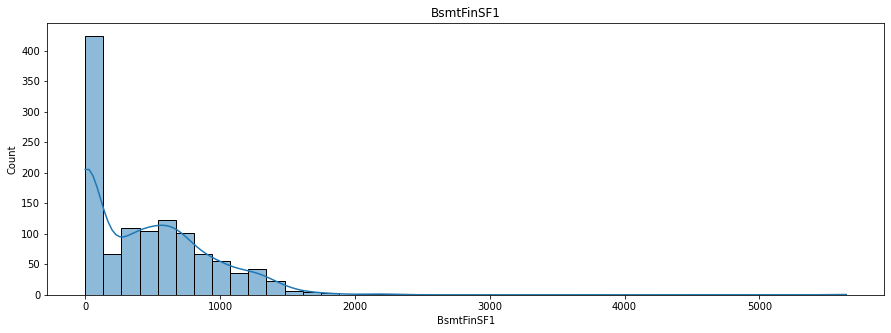

In [719]:

f,ax=plt.subplots(figsize=(15,5))
ax.set_title('BsmtFinSF1')
sns.histplot(data=data, x="BsmtFinSF1", kde=True)


<AxesSubplot:title={'center':'BsmtFinSF2'}, xlabel='BsmtFinSF2', ylabel='Count'>

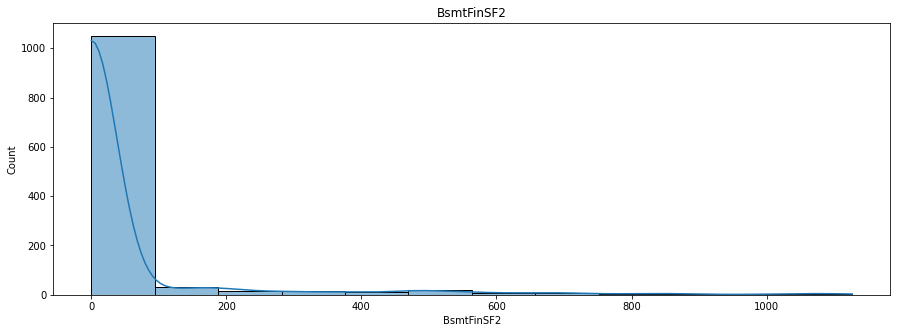

In [720]:
f,ax=plt.subplots(figsize=(15,5))
ax.set_title('BsmtFinSF2')
sns.histplot(data=data, x="BsmtFinSF2", kde=True)


<AxesSubplot:title={'center':'BsmtUnfSF'}, xlabel='BsmtUnfSF', ylabel='Count'>

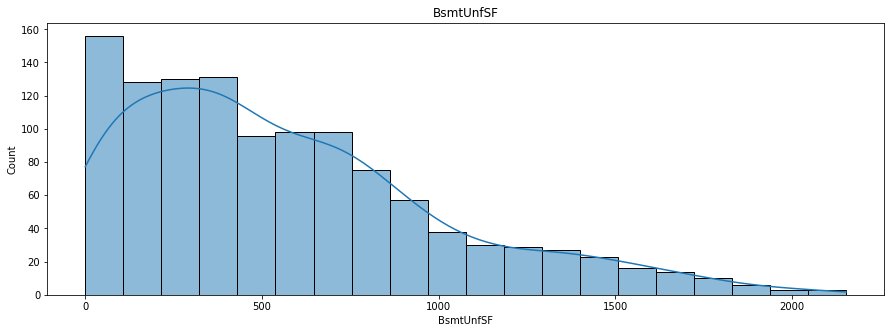

In [721]:

f,ax=plt.subplots(figsize=(15,5))
ax.set_title('BsmtUnfSF')
sns.histplot(data=data, x="BsmtUnfSF", kde=True)


<AxesSubplot:title={'center':'TotalBsmtSF'}, xlabel='TotalBsmtSF', ylabel='Count'>

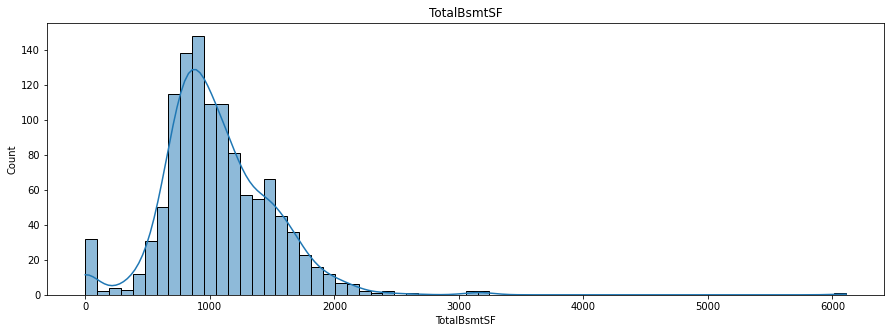

In [722]:
f,ax=plt.subplots(figsize=(15,5))
ax.set_title('TotalBsmtSF')
sns.histplot(data=data, x="TotalBsmtSF", kde=True)


In [723]:
data["1stFlrSF"]

0       1734
1        790
2       1966
3        673
4       1314
        ... 
1163    1479
1164     842
1165     905
1166    1118
1167    1593
Name: 1stFlrSF, Length: 1168, dtype: int64

<AxesSubplot:title={'center':'1stFlrSF'}, xlabel='1stFlrSF', ylabel='Count'>

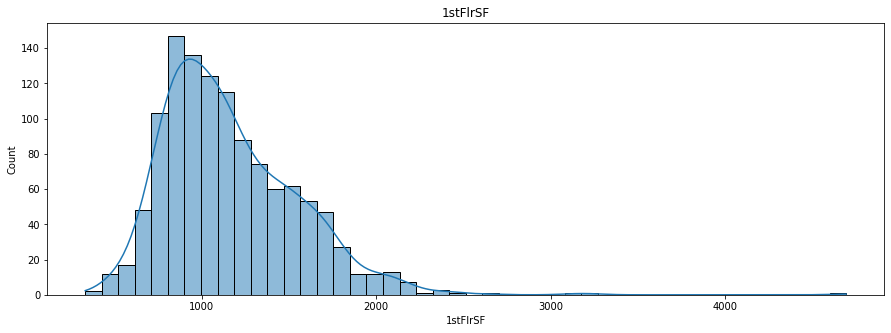

In [724]:
f,ax=plt.subplots(figsize=(15,5))
ax.set_title('1stFlrSF')
sns.histplot(data=data, x="1stFlrSF", kde=True)


In [725]:
data['2ndFlrSF']

0          0
1        784
2       1174
3        709
4          0
        ... 
1163       0
1164     630
1165     881
1166       0
1167       0
Name: 2ndFlrSF, Length: 1168, dtype: int64

<AxesSubplot:title={'center':'2ndFlrSF'}, xlabel='2ndFlrSF', ylabel='Count'>

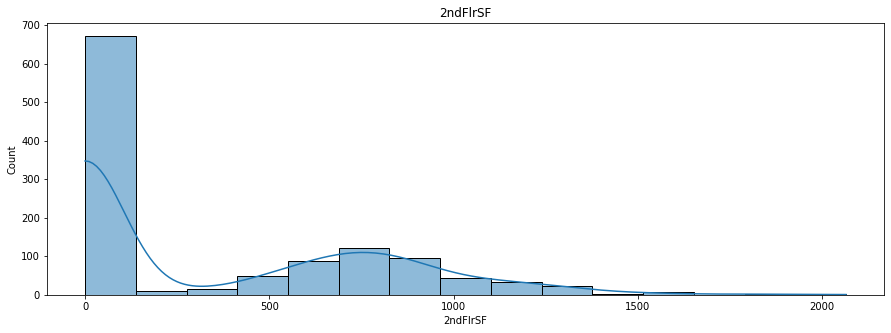

In [726]:
f,ax=plt.subplots(figsize=(15,5))
ax.set_title('2ndFlrSF')
sns.histplot(data=data, x="2ndFlrSF", kde=True)


In [727]:
def sec_flr(x):
    if x==0:
        return "No"
    else:
        return "Yes"
data['have_scd_flr']=data["2ndFlrSF"].apply(lambda x:sec_flr(x))

In [728]:
data['have_scd_flr']

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
1163     No
1164    Yes
1165    Yes
1166     No
1167     No
Name: have_scd_flr, Length: 1168, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


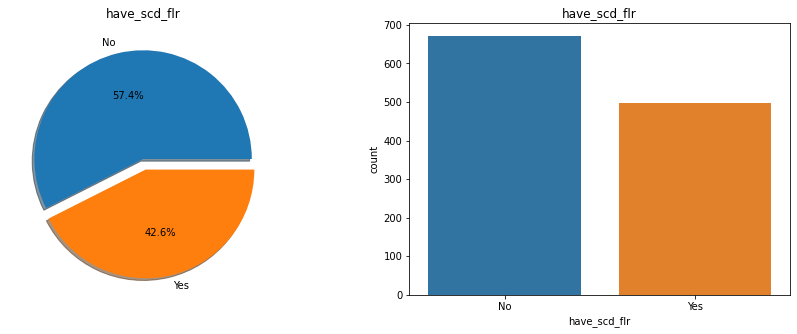

In [729]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['have_scd_flr'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('have_scd_flr')
ax[0].set_ylabel('')
sns.countplot('have_scd_flr',data=data,ax=ax[1])
ax[1].set_title('have_scd_flr')
plt.show()

#### we found that the most houses don't have second floor

In [730]:
def check_q(x):
    if x==0:
        return "Yes"
    else:
        return "No"
data["high_q_flr"]=data["LowQualFinSF"].apply(lambda x:check_q(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


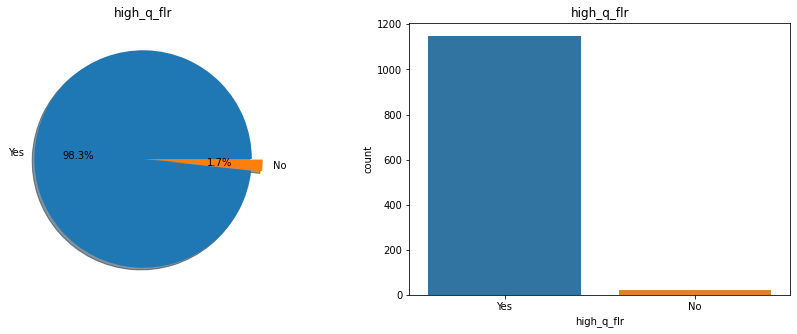

In [731]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['high_q_flr'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('high_q_flr')
ax[0].set_ylabel('')
sns.countplot('high_q_flr',data=data,ax=ax[1])
ax[1].set_title('high_q_flr')
plt.show()

#### most of the houses have high qulaity finished square feet for floors

<AxesSubplot:title={'center':'GrLivArea'}, xlabel='GrLivArea', ylabel='Count'>

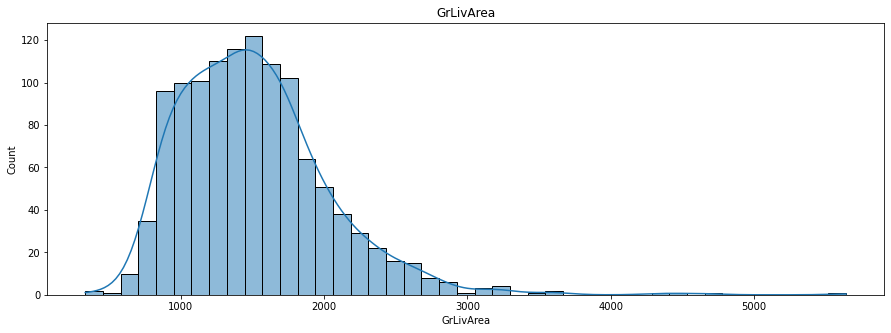

In [732]:

f,ax=plt.subplots(figsize=(15,5))
ax.set_title('GrLivArea')
sns.histplot(data=data, x="GrLivArea", kde=True)


In [733]:
data["BsmtFullBath"].value_counts()

0    685
1    469
2     14
Name: BsmtFullBath, dtype: int64

In [734]:
data["BsmtHalfBath"].value_counts()

0    1100
1      66
2       2
Name: BsmtHalfBath, dtype: int64

In [735]:
data["FullBath"].value_counts()

2    622
1    514
3     25
0      7
Name: FullBath, dtype: int64

In [736]:
data["HalfBath"].value_counts()

0    732
1    426
2     10
Name: HalfBath, dtype: int64

In [737]:
data["BedroomAbvGr"].value_counts()

3    650
2    283
4    167
1     40
5     17
6      6
0      5
Name: BedroomAbvGr, dtype: int64

In [738]:
data["KitchenAbvGr"].value_counts()

1    1114
2      51
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [739]:
data["TotRmsAbvGrd"].value_counts()

6     322
7     261
5     224
8     150
4      78
9      62
10     33
11     15
3      13
12      9
2       1
Name: TotRmsAbvGrd, dtype: int64

In [740]:
data["SpareRome"]=data["TotRmsAbvGrd"]-data["BedroomAbvGr"]-data["KitchenAbvGr"]

In [741]:
data["SpareRome"].value_counts()

2    429
3    332
1    177
4    151
5     47
6     15
0      8
7      6
8      3
Name: SpareRome, dtype: int64

In [742]:
data["Fireplaces"].value_counts()

0    546
1    535
2     83
3      4
Name: Fireplaces, dtype: int64

In [743]:
data["GarageYrBlt"].value_counts()

54.0      69
2005.0    54
2004.0    45
2006.0    44
2007.0    43
          ..
1982.0     1
1947.0     1
1933.0     1
1908.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [744]:
data["GarageYrBlt"][0]

2005.0

In [745]:
data["YearBuilt"].value_counts()

2005    52
2006    50
2004    46
2007    45
2003    35
        ..
1898     1
1905     1
1913     1
1906     1
1893     1
Name: YearBuilt, Length: 109, dtype: int64

In [746]:
len(data["YearBuilt"])

1168

In [747]:
for i in range(len(data["YearBuilt"])):
    if data["GarageYrBlt"][i]<1000:
        data["GarageYrBlt"][i]=data["YearBuilt"][i]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [748]:
data["GarageYrBlt"].value_counts()

2005.0    54
2004.0    46
2006.0    45
2007.0    44
2003.0    39
          ..
1872.0     1
1942.0     1
1921.0     1
1908.0     1
1906.0     1
Name: GarageYrBlt, Length: 100, dtype: int64

In [749]:
data["GarageCars"].value_counts()

2    660
1    291
3    145
0     69
4      3
Name: GarageCars, dtype: int64

In [750]:
data["GarageArea"].value_counts()

0      69
440    42
576    37
240    30
484    29
       ..
522     1
322     1
319     1
860     1
682     1
Name: GarageArea, Length: 391, dtype: int64

In [751]:
def have_Garage(x):
    if x==0:
        return "No"
    else:
        return "Yes"
data["HaveGarage"]=data["GarageCars"].apply(lambda x:have_Garage(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


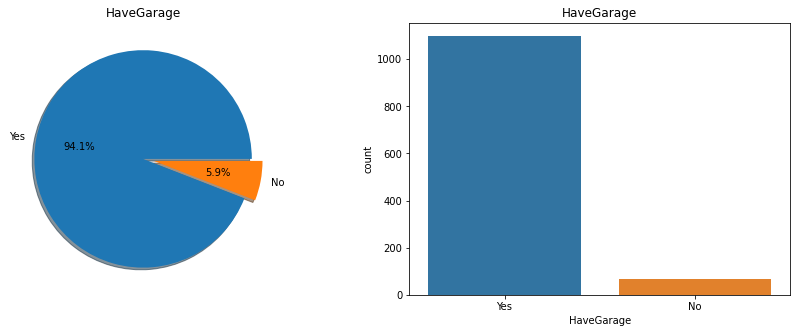

In [752]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['HaveGarage'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('HaveGarage')
ax[0].set_ylabel('')
sns.countplot('HaveGarage',data=data,ax=ax[1])
ax[1].set_title('HaveGarage')
plt.show()

#### we found that there are around 6% of houses don't have garage

In [753]:
data["WoodDeckSF"]

0       160
1       306
2       144
3       153
4       172
       ... 
1163    120
1164      0
1165      0
1166    203
1167      0
Name: WoodDeckSF, Length: 1168, dtype: int64

<AxesSubplot:title={'center':'WoodDeckSF'}, xlabel='WoodDeckSF', ylabel='Count'>

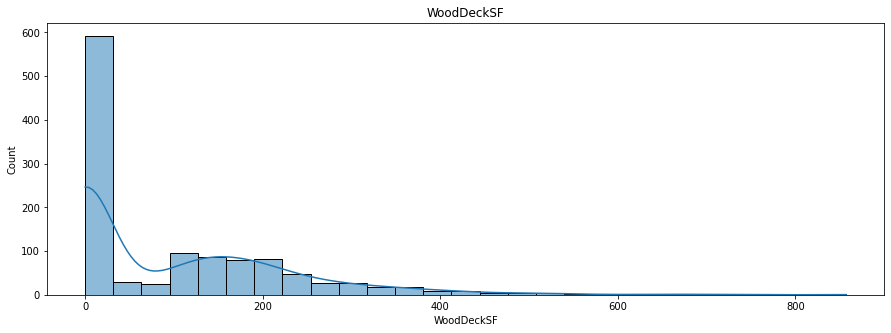

In [754]:

f,ax=plt.subplots(figsize=(15,5))
ax.set_title('WoodDeckSF')
sns.histplot(data=data, x="WoodDeckSF", kde=True)


In [755]:
data["WoodDeckSF"].value_counts()

0      586
192     30
100     29
144     28
120     27
      ... 
295      1
45       1
162      1
63       1
421      1
Name: WoodDeckSF, Length: 248, dtype: int64

In [756]:
def wooddeck(x):
    if x==0:
        return "No"
    else:
        return "Yes"
data["HaveWoodDeck"]=data["WoodDeckSF"].apply(lambda x:wooddeck(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


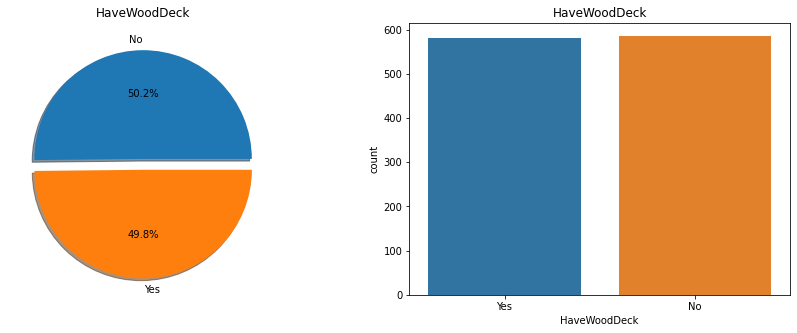

In [757]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['HaveWoodDeck'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('HaveWoodDeck')
ax[0].set_ylabel('')
sns.countplot('HaveWoodDeck',data=data,ax=ax[1])
ax[1].set_title('HaveWoodDeck')
plt.show()

In [758]:
data["OpenPorchSF"]

0        24
1       111
2        78
3        50
4        62
       ... 
1163     25
1164      0
1165    162
1166      0
1167    120
Name: OpenPorchSF, Length: 1168, dtype: int64

In [759]:
data["OpenPorchSF"].value_counts()

0      513
36      22
20      17
48      17
45      16
      ... 
122      1
119      1
187      1
241      1
162      1
Name: OpenPorchSF, Length: 189, dtype: int64

In [760]:
def haveopen(x):
    if x==0:
        return "No"
    else:
        return "Yes"
    
data["WithOpenPorch"]=data["OpenPorchSF"].apply(lambda x:haveopen(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


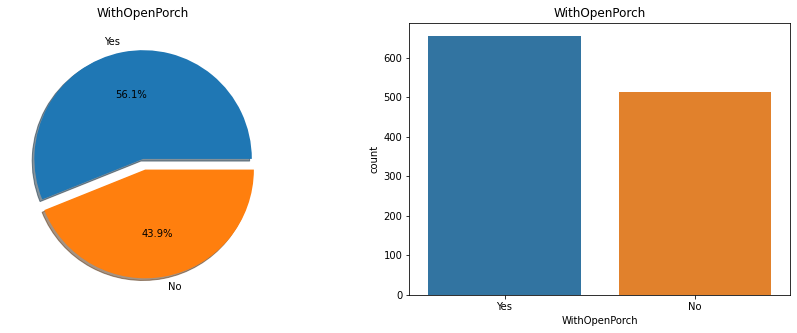

In [761]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['WithOpenPorch'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('WithOpenPorch')
ax[0].set_ylabel('')
sns.countplot('WithOpenPorch',data=data,ax=ax[1])
ax[1].set_title('WithOpenPorch')
plt.show()

In [762]:
data["EnclosedPorch"].value_counts()

0      1010
112      11
120       4
156       4
192       4
       ... 
280       1
272       1
268       1
123       1
239       1
Name: EnclosedPorch, Length: 97, dtype: int64

In [763]:
def havecolse(x):
    if x==0:
        return "No"
    else:
        return "Yes"
    
data["WithClosePorch"]=data["EnclosedPorch"].apply(lambda x:havecolse(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


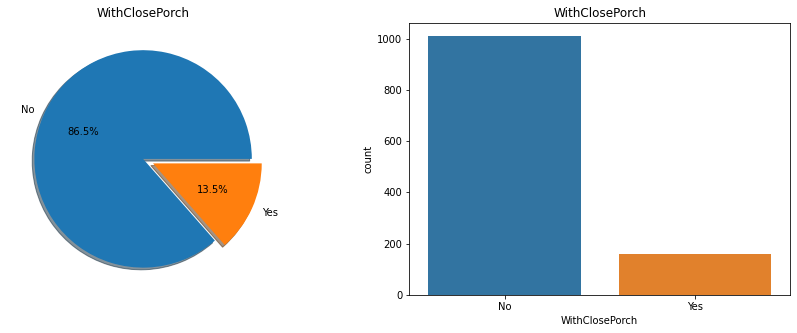

In [764]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['WithClosePorch'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('WithClosePorch')
ax[0].set_ylabel('')
sns.countplot('WithClosePorch',data=data,ax=ax[1])
ax[1].set_title('WithClosePorch')
plt.show()

In [765]:
data["3SsnPorch"].value_counts()

0      1145
144       2
168       2
216       2
180       2
320       1
182       1
162       1
140       1
196       1
290       1
153       1
245       1
238       1
508       1
407       1
304       1
96        1
130       1
23        1
Name: 3SsnPorch, dtype: int64

In [766]:
def have3Ssn(x):
    if x==0:
        return "No"
    else:
        return "Yes"
    
data["With3SsnPorch"]=data["3SsnPorch"].apply(lambda x:have3Ssn(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


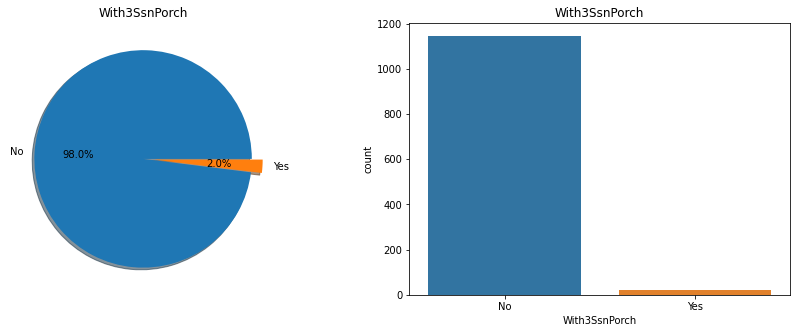

In [767]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['With3SsnPorch'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('With3SsnPorch')
ax[0].set_ylabel('')
sns.countplot('With3SsnPorch',data=data,ax=ax[1])
ax[1].set_title('With3SsnPorch')
plt.show()

In [768]:
data["ScreenPorch"].value_counts()

0      1080
120       5
224       4
180       4
192       4
       ... 
145       1
161       1
184       1
152       1
156       1
Name: ScreenPorch, Length: 63, dtype: int64

In [769]:
def haveScreen(x):
    if x==0:
        return "No"
    else:
        return "Yes"
    
data["WithScreenPorch"]=data["ScreenPorch"].apply(lambda x:haveScreen(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


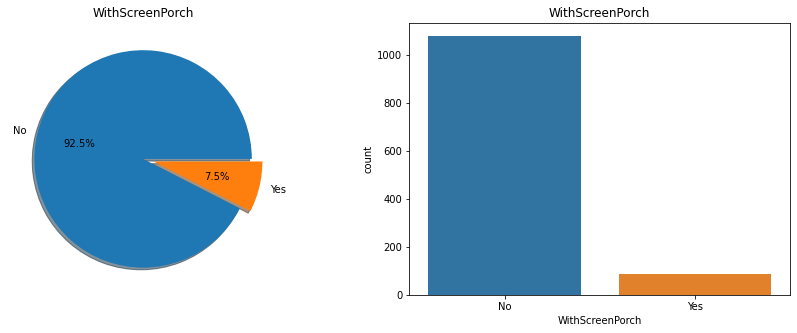

In [770]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['WithScreenPorch'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('WithScreenPorch')
ax[0].set_ylabel('')
sns.countplot('WithScreenPorch',data=data,ax=ax[1])
ax[1].set_title('WithScreenPorch')
plt.show()

In [771]:
data["HouseWithPorch"]=data["ScreenPorch"]-data["3SsnPorch"]-data["EnclosedPorch"]-data["OpenPorchSF"]

In [772]:
def havePorch(x):
    if x==0:
        return "No"
    else:
        return "Yes"
data["HouseWithPorch"]=data["HouseWithPorch"].apply(lambda x:havePorch(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


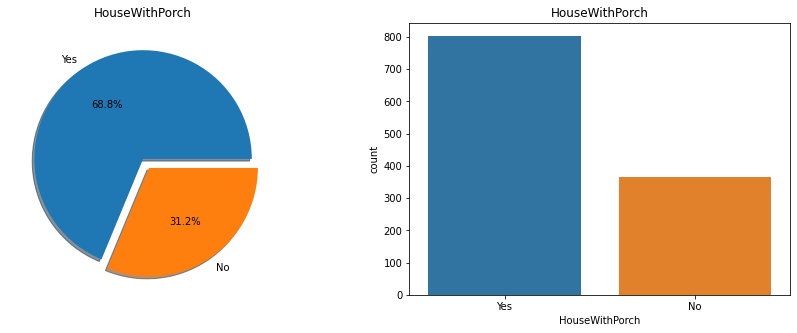

In [773]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['HouseWithPorch'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('HouseWithPorch')
ax[0].set_ylabel('')
sns.countplot('HouseWithPorch',data=data,ax=ax[1])
ax[1].set_title('HouseWithPorch')
plt.show()

In [774]:
data["PoolArea"].value_counts()

0      1163
738       1
555       1
512       1
480       1
576       1
Name: PoolArea, dtype: int64

In [775]:
def havepool(x):
    if x==0:
        return "No"
    else:
        return "Yes"
    
data["HouseWithPool"]=data["PoolArea"].apply(lambda x:havepool(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


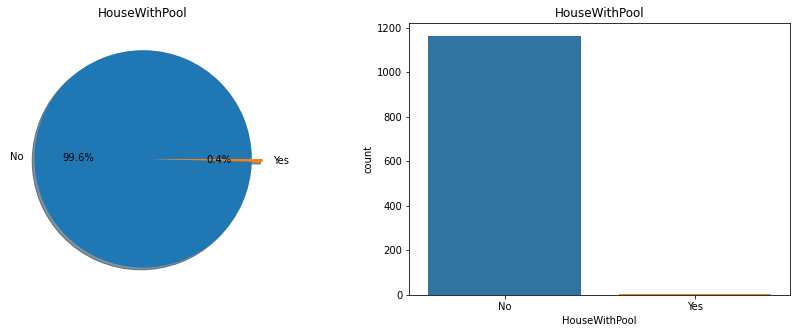

In [776]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['HouseWithPool'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('HouseWithPool')
ax[0].set_ylabel('')
sns.countplot('HouseWithPool',data=data,ax=ax[1])
ax[1].set_title('HouseWithPool')
plt.show()

In [777]:
data["MiscVal"].value_counts()

0        1125
400         9
500         8
700         4
450         4
2000        3
600         2
1200        2
15500       1
560         1
620         1
480         1
1150        1
2500        1
3500        1
8300        1
350         1
1300        1
800         1
Name: MiscVal, dtype: int64

In [778]:
def addcost(x):
    if x==0:
        return "No"
    else:
        return "Yes"
data["HouseWithAdditions"]=data["MiscVal"].apply(lambda x:addcost(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


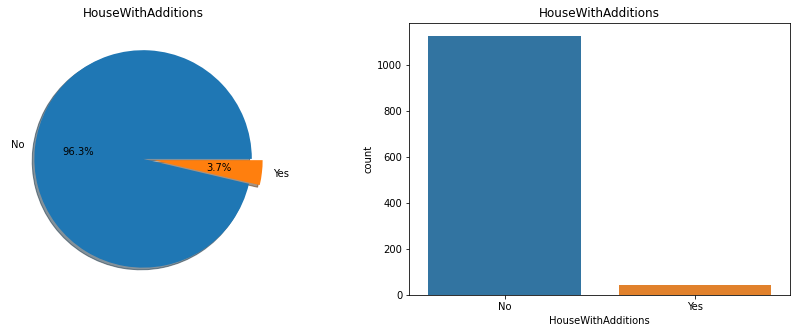

In [779]:
f,ax=plt.subplots(1,2,figsize=(15,5))
data['HouseWithAdditions'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('HouseWithAdditions')
ax[0].set_ylabel('')
sns.countplot('HouseWithAdditions',data=data,ax=ax[1])
ax[1].set_title('HouseWithAdditions')
plt.show()

In [780]:
data["MoSold"].value_counts()

7     198
6     198
5     165
4     113
8      97
3      84
10     70
11     58
12     51
9      46
1      45
2      43
Name: MoSold, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MoSold', ylabel='count'>

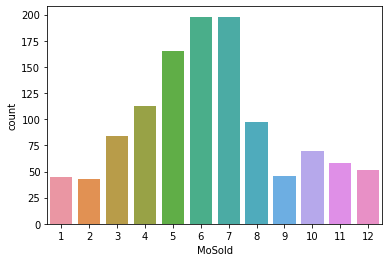

In [781]:
sns.countplot('MoSold',data=data)

#### We found that in the second quarter and half of therd quarter

In [782]:
data["YrSold"]

0       2006
1       2006
2       2009
3       2006
4       2009
        ... 
1163    2008
1164    2007
1165    2007
1166    2008
1167    2008
Name: YrSold, Length: 1168, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='YrSold', ylabel='count'>

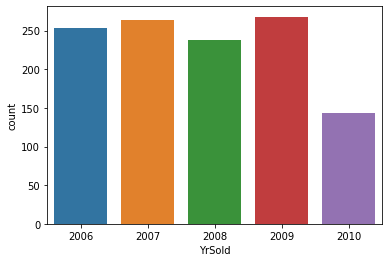

In [783]:
sns.countplot('YrSold',data=data)

In [784]:
data["GarageType"].value_counts()

Attchd     698
Detchd     307
BuiltIn     70
698         69
Basment     12
CarPort      6
2Types       6
Name: GarageType, dtype: int64

- 2Types	More than one type of garage
- Attchd	Attached to home
- Basment	Basement Garage
- BuiltIn	Built-In (Garage part of house - typically has room above garage)
- CarPort	Car Port
- Detchd	Detached from home
- NA	No Garage

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


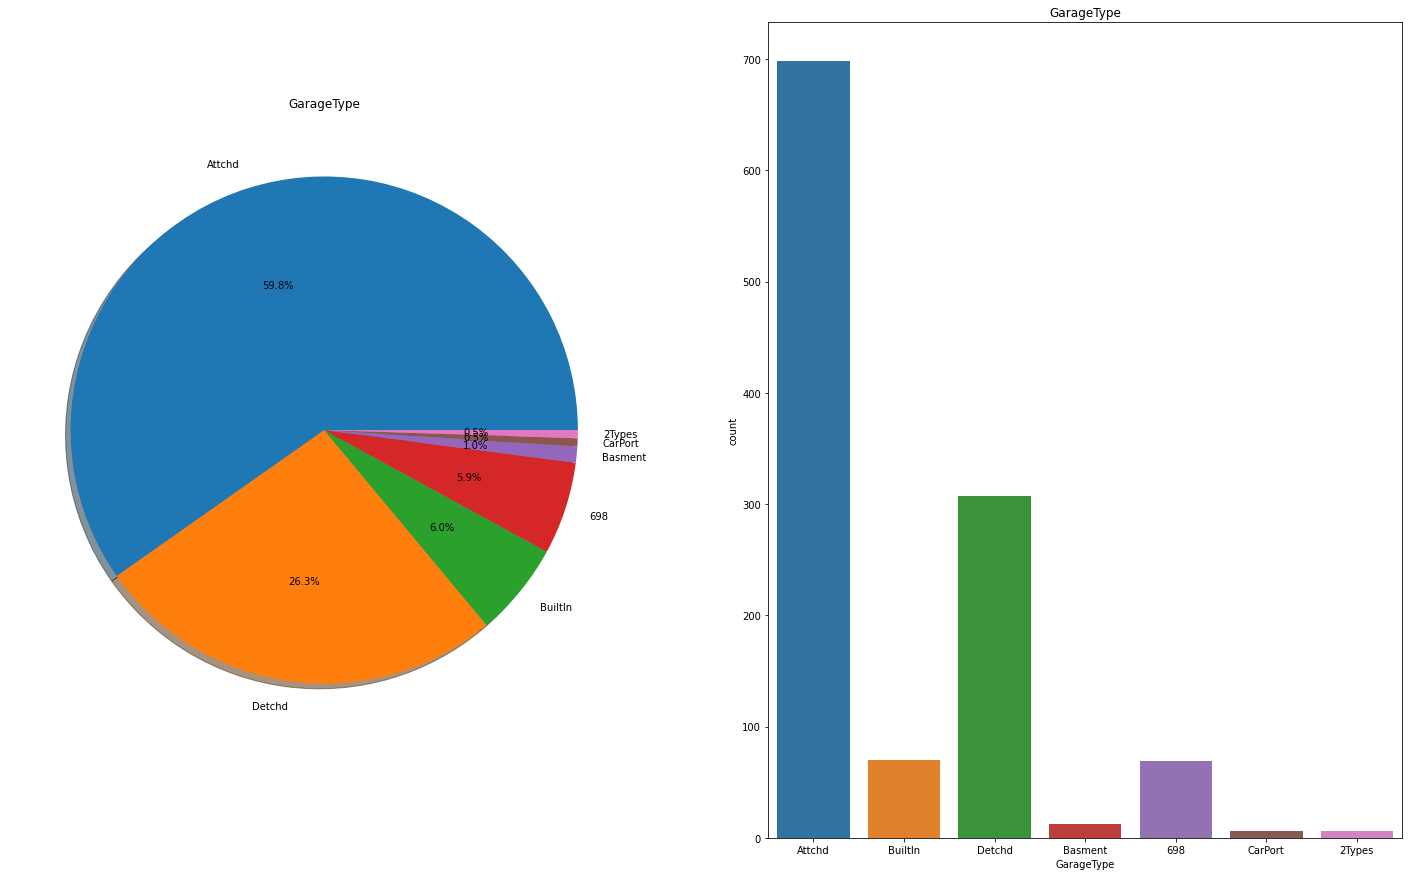

In [785]:
f,ax=plt.subplots(1,2,figsize=(25,15))
data['GarageType'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('GarageType')
ax[0].set_ylabel('')
sns.countplot('GarageType',data=data,ax=ax[1])
ax[1].set_title('GarageType')
plt.show()

#### We found that most of garage type are Attchd Attached to home

In [786]:
data["GarageFinish"]=data["GarageFinish"].replace({473:"NA"})
data["GarageFinish"].value_counts()

Unf    473
RFn    348
Fin    278
NA      69
Name: GarageFinish, dtype: int64

- Fin	Finished
- RFn	Rough Finished	
- Unf	Unfinished
- NA	No Garage

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


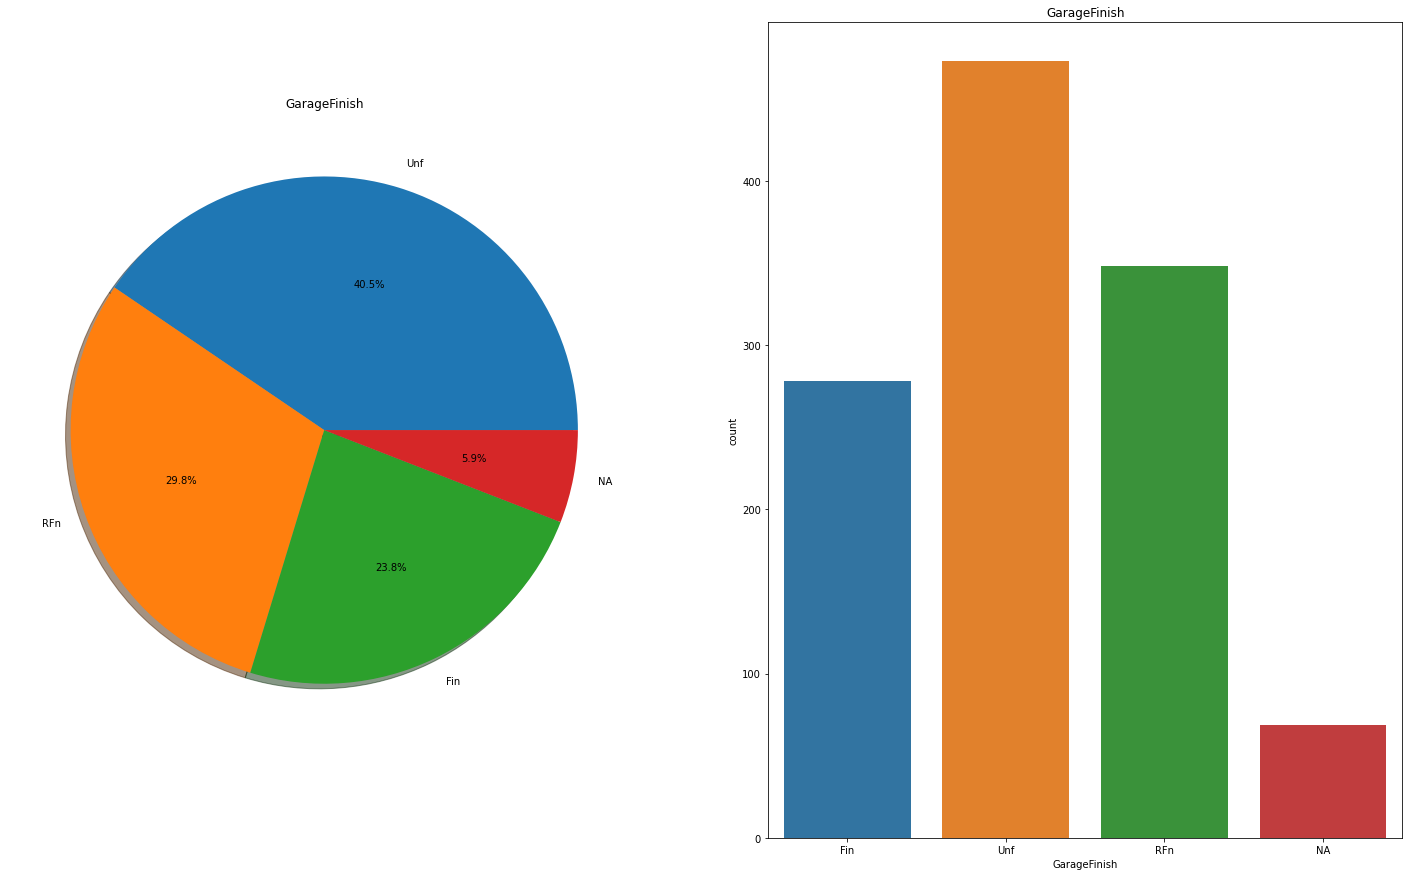

In [787]:
f,ax=plt.subplots(1,2,figsize=(25,15))
data['GarageFinish'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('GarageFinish')
ax[0].set_ylabel('')
sns.countplot('GarageFinish',data=data,ax=ax[1])
ax[1].set_title('GarageFinish')
plt.show()

#### We found that most of grage not finished yet

In [788]:
data["GarageQual"]=data["GarageQual"].replace({1044:"NA"})
data["GarageQual"].value_counts()

TA    1044
NA      69
Fa      40
Gd      11
Ex       3
Po       1
Name: GarageQual, dtype: int64

- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor
- NA	No Garage

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


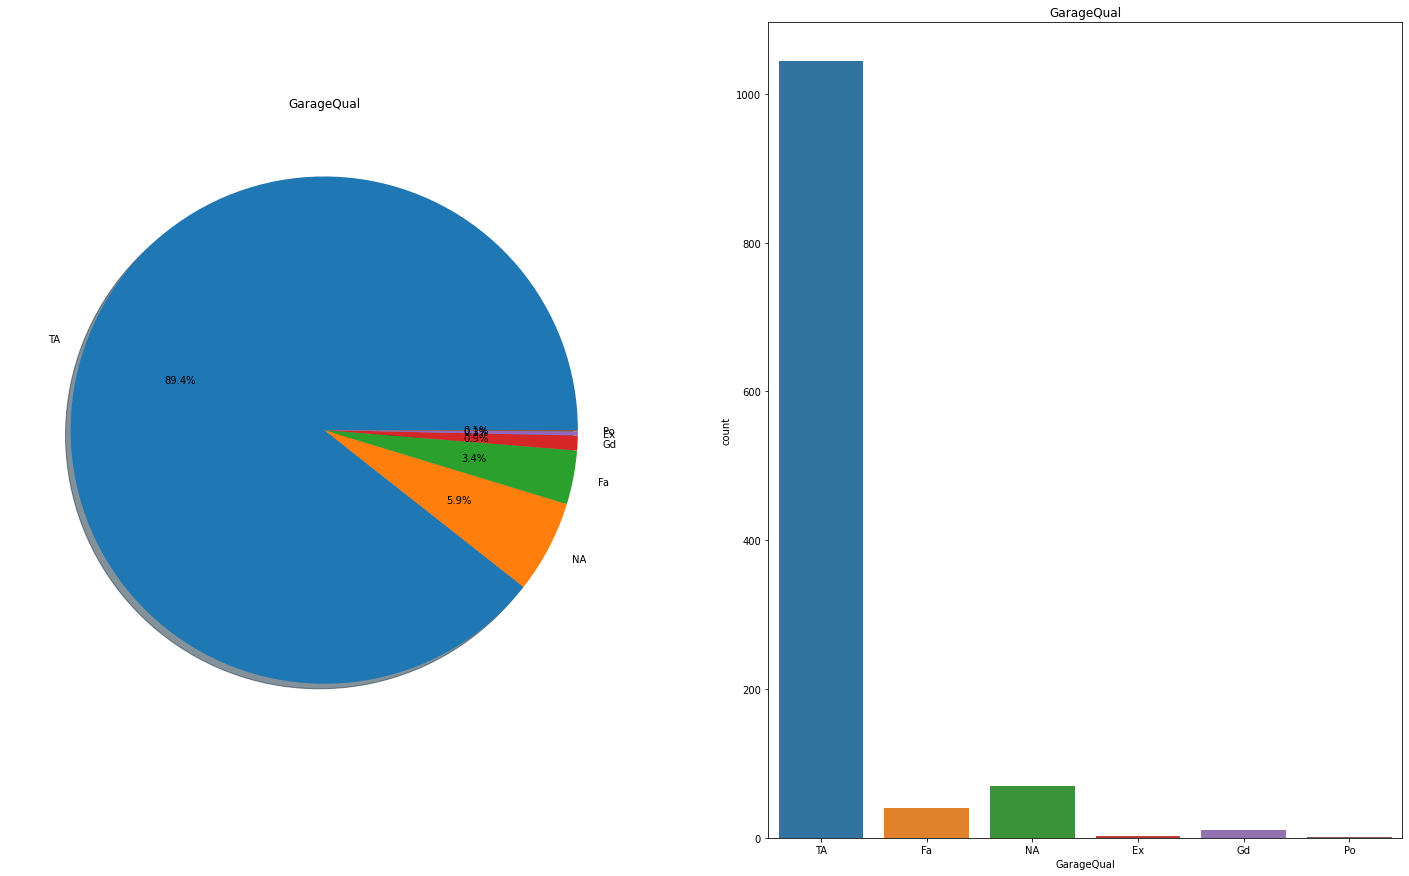

In [789]:
f,ax=plt.subplots(1,2,figsize=(25,15))
data['GarageQual'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('GarageQual')
ax[0].set_ylabel('')
sns.countplot('GarageQual',data=data,ax=ax[1])
ax[1].set_title('GarageQual')
plt.show()

#### We found that most of garage have average qulaity

In [790]:
data["GarageCond"]=data["GarageCond"].replace({1056:"NA"})
data["GarageCond"].value_counts()

TA    1056
NA      69
Fa      28
Gd       8
Po       5
Ex       2
Name: GarageCond, dtype: int64

- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor
- NA	No Garage

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


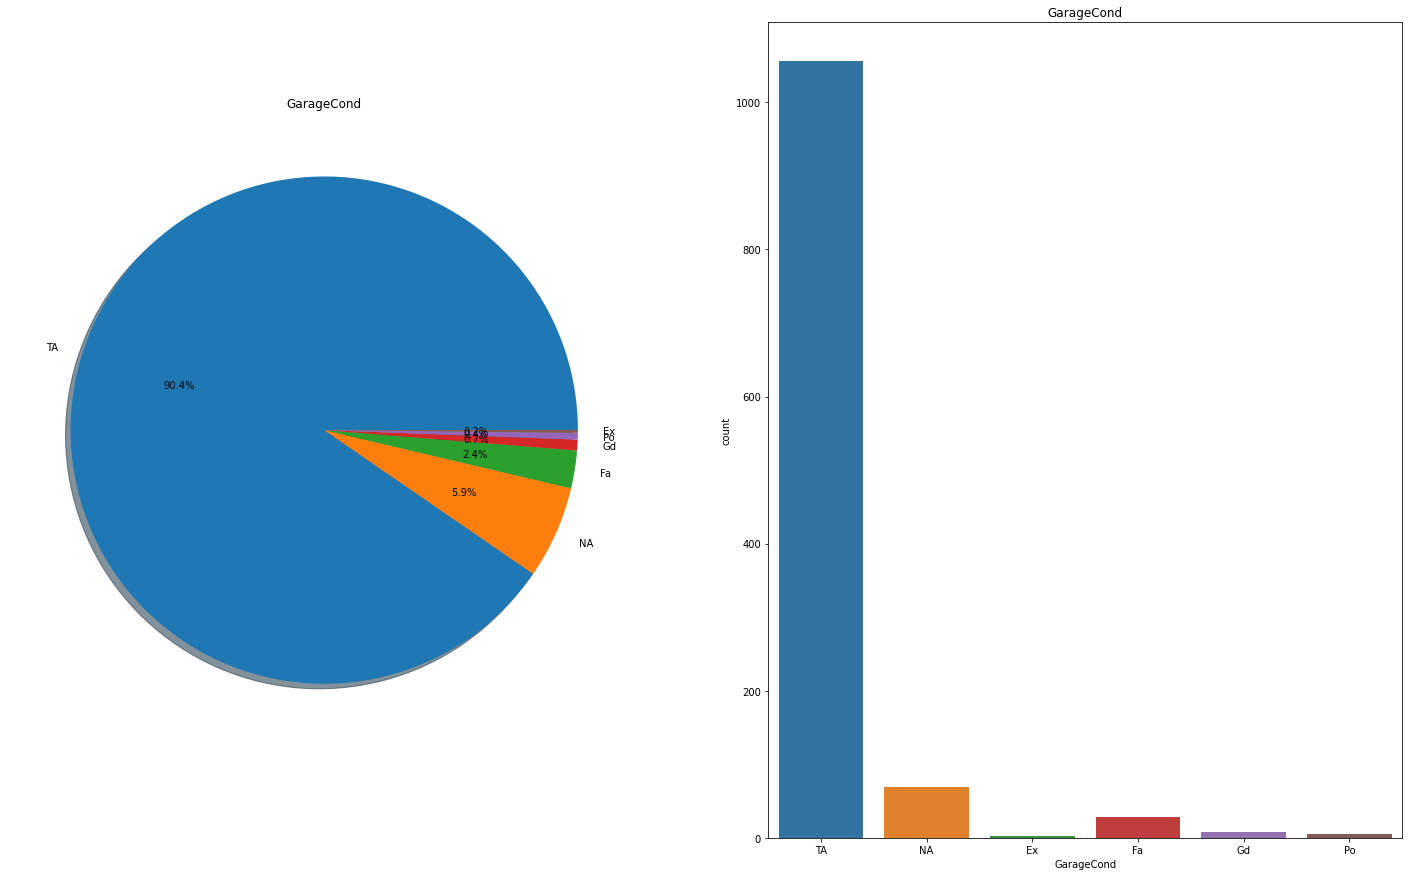

In [791]:
f,ax=plt.subplots(1,2,figsize=(25,15))
data['GarageCond'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('GarageCond')
ax[0].set_ylabel('')
sns.countplot('GarageCond',data=data,ax=ax[1])
ax[1].set_title('GarageCond')
plt.show()

### We found that most of garag have average conditions

In [792]:
data.describe(exclude="number")

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,high_q_flr,HaveGarage,HaveWoodDeck,WithOpenPorch,WithClosePorch,With3SsnPorch,WithScreenPorch,HouseWithPorch,HouseWithPool,HouseWithAdditions
count,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,...,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
unique,15,5,2,4,4,2,5,3,25,9,...,2,2,2,2,2,2,2,2,2,2
top,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Yes,Yes,No,Yes,No,No,No,Yes,No,No
freq,439,927,1164,731,1059,1167,827,1115,185,1008,...,1148,1099,586,655,1010,1145,1080,803,1163,1125


In [793]:
leb=LabelEncoder()


In [794]:
df_cat = data.select_dtypes(exclude=['number'])
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'source',
       'RemorAdd', 'HaveVnr', 'have_scd_flr', 'high_q_flr', 'HaveGarage',
       'HaveWoodDeck', 'WithOpenPorch', 'WithClosePorch', 'With3SsnPorch',
       'WithScreenPorch', 'HouseWithPorch', 'HouseWithPool',
       'HouseWithAdditions'],
      dtype='object')

In [795]:
data0=data.copy()

In [796]:
data["MasVnrType"]=data["MasVnrType"].replace({684:"CBlock"})

In [797]:
data["Electrical"]=data["Electrical"].replace({1068:"Mix"})

In [798]:
data["Utilities"]=data["Utilities"].replace({"AllPub":4,
                                            "NoSewr":3,
                                            "NoSeWa":2,
                                            "ELO":1})

data["RemorAdd"]=data["RemorAdd"].replace({"No":0,
                                          "Yes":1})
data["CentralAir"]=data["CentralAir"].replace({"No":0,
                                          "Yes":1})
data["HaveVnr"]=data["HaveVnr"].replace({"No":0,
                                          "Yes":1})
data["have_scd_flr"]=data["have_scd_flr"].replace({"No":0,
                                          "Yes":1})
data["high_q_flr"]=data["high_q_flr"].replace({"No":0,
                                          "Yes":1})
data["HaveGarage"]=data["HaveGarage"].replace({"No":0,
                                          "Yes":1})
data["HaveWoodDeck"]=data["HaveWoodDeck"].replace({"No":0,
                                          "Yes":1})
data["WithOpenPorch"]=data["WithOpenPorch"].replace({"No":0,
                                          "Yes":1})
data["WithClosePorch"]=data["WithClosePorch"].replace({"No":0,
                                          "Yes":1})
data["With3SsnPorch"]=data["With3SsnPorch"].replace({"No":0,
                                          "Yes":1})
data["WithScreenPorch"]=data["WithScreenPorch"].replace({"No":0,
                                          "Yes":1})
data["HouseWithPorch"]=data["HouseWithPorch"].replace({"No":0,
                                          "Yes":1})
data["HouseWithPool"]=data["HouseWithPool"].replace({"No":0,
                                          "Yes":1})
data["HouseWithAdditions"]=data["HouseWithAdditions"].replace({"No":0,
                                          "Yes":1})
data["CentralAir"]=data["CentralAir"].replace({"N":0,
                                          "Y":1})
data["GarageQual"]=data["GarageQual"].replace({"NA":0,
                                          "Po":1,
                                          "Fa":2,
                                          "TA":3,
                                          "Gd":4,
                                          "Ex":5})
data["GarageCond"]=data["GarageCond"].replace({"NA":0,
                                          "Po":1,
                                          "Fa":2,
                                          "TA":3,
                                          "Gd":4,
                                          "Ex":5})
data["ExterQual"]=data["ExterQual"].replace({"Po":0,
                                            "Fa":1,
                                            "TA":2,
                                            "Gd":3,
                                            "Ex":4})
data["ExterCond"]=data["ExterCond"].replace({"Po":0,
                                            "Fa":1,
                                            "TA":2,
                                            "Gd":3,
                                            "Ex":4})
data["BsmtQual"]=data["BsmtQual"].replace({"NA":0,
                                          "Po":1,
                                          "Fa":2,
                                          "TA":3,
                                          "Gd":4,
                                          "Ex":5,
                                          515:0})
data["BsmtExposure"]=data["BsmtExposure"].replace({"NA":0,
                                                  "No":1,
                                                  "Mn":2,
                                                  "Av":3,
                                                  "Gd":4})
data["GarageFinish"]=data["GarageFinish"].replace({"NA":0,
                                                  "Unf":1,
                                                  "RFn":2,
                                                  "Fin":3})
data["BsmtFinType1"]=data["BsmtFinType1"].replace({"NA":0,
                                                  "Unf":1,
                                                  "LwQ":2,
                                                  "Rec":3,
                                                  "BLQ":4,
                                                  "ALQ":5,
                                                  "GLQ":6})
data["BsmtFinType2"]=data["BsmtFinType2"].replace({"NA":0,
                                                  "Unf":1,
                                                  "LwQ":2,
                                                  "Rec":3,
                                                  "BLQ":4,
                                                  "ALQ":5,
                                                  "GLQ":6})
data["HeatingQC"]=data["HeatingQC"].replace({"Po":0,
                                            "Fa":1,
                                            "TA":2,
                                            "Gd":3,
                                            "Ex":4})
data["KitchenQual"]=data["KitchenQual"].replace({"Po":0,
                                            "Fa":1,
                                            "TA":2,
                                            "Gd":3,
                                            "Ex":4})
data["LandSlope"]=data["LandSlope"].replace({"Gtl":0,
                                            "Mod":1,
                                            "Sev":2})
data["GarageType"]=data["GarageType"].replace({698:0,
                                              "Detchd":1,
                                              "CarPort":2,
                                              "BuiltIn":3,
                                              "Basment":4,
                                              "Attchd":5,
                                              "2Types":6})
"""
data["Condition2"]=leb.fit_transform(data["Condition2"])
data["BldgType"]=leb.fit_transform(data["BldgType"])
data["HouseStyle"]=leb.fit_transform(data["HouseStyle"])
data["RoofStyle"]=leb.fit_transform(data["RoofStyle"])
data["RoofMatl"]=leb.fit_transform(data["RoofMatl"])
data["Exterior1st"]=leb.fit_transform(data["Exterior1st"])
data["Exterior2nd"]=leb.fit_transform(data["Exterior2nd"])
data["MasVnrType"]=leb.fit_transform(data["MasVnrType"])
data["Foundation"]=leb.fit_transform(data["Foundation"])
data["Heating"]=leb.fit_transform(data["Heating"])
data["Electrical"]=leb.fit_transform(data["Electrical"])
data["Functional"]=leb.fit_transform(data["Functional"])
data["PavedDrive"]=leb.fit_transform(data["PavedDrive"])
data["SaleType"]=leb.fit_transform(data["SaleType"])
data["SaleCondition"]=leb.fit_transform(data["SaleCondition"])
data["MSZoning"]=leb.fit_transform(data["MSZoning"])
data["Street"]=leb.fit_transform(data["Street"])
data["LotShape"]=leb.fit_transform(data["LotShape"])
data["LandContour"]=leb.fit_transform(data["LandContour"])
data["LotConfig"]=leb.fit_transform(data["LotConfig"])
data["Neighborhood"]=leb.fit_transform(data["Neighborhood"])
data["Condition1"]=leb.fit_transform(data["Condition1"])
data["MSSubClass"]=leb.fit_transform(data["MSSubClass"])"""
data["BsmtCond"]=data["BsmtCond"].replace({"Na":0,
                                         1051:0,
                                         "Po":1,
                                         "Fa":2,
                                         "TA":3,
                                         "Gd":4,
                                         "Ex":5})

In [799]:
list_one_hot=["MSSubClass","Condition1","Neighborhood","LotConfig","LandContour","LotShape","Street","MSZoning","SaleCondition","SaleType","PavedDrive","Functional","Electrical","Heating","Foundation","MasVnrType","Exterior2nd","Exterior1st","RoofMatl","RoofStyle","HouseStyle","BldgType","Condition2"]


In [800]:
data1= pd.get_dummies(data,columns=list_one_hot).reset_index(drop=True)


In [801]:
df_cat = data1.select_dtypes(exclude=['number'])
df_cat.columns

Index(['source'], dtype='object')

In [802]:
train_pr = data1.loc[data1['source']=="train"]
test_pr = data1.loc[data1['source']=="test"]

In [803]:
train_pr=train_pr.drop("source",axis=1)
test_pr=test_pr.drop("source",axis=1)

<Figure size 720x576 with 0 Axes>

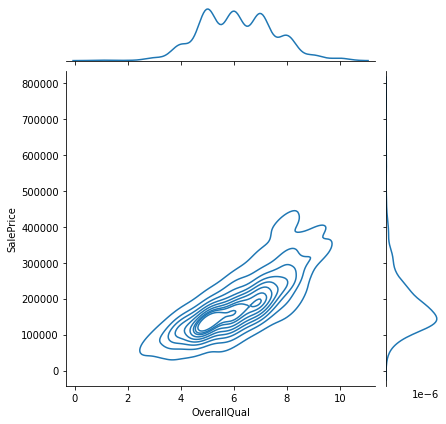

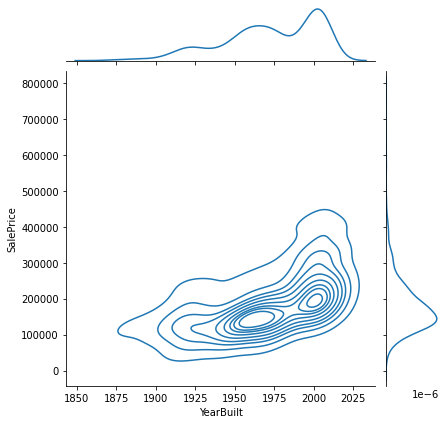

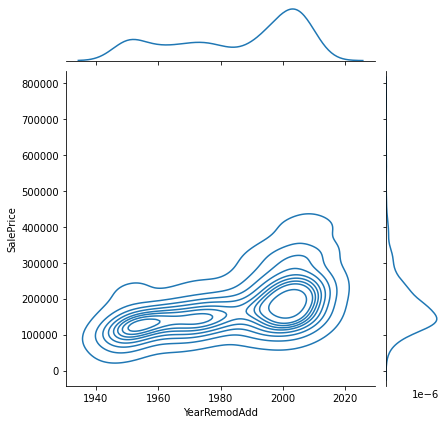

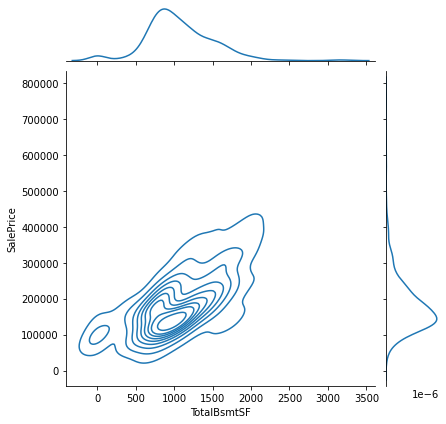

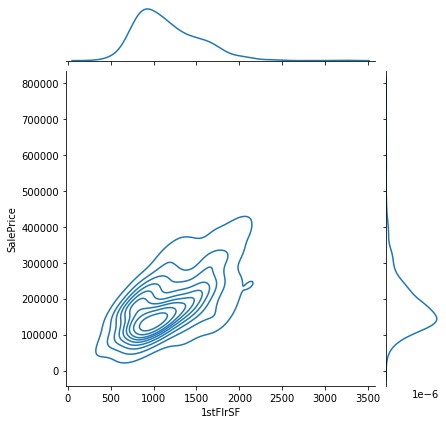

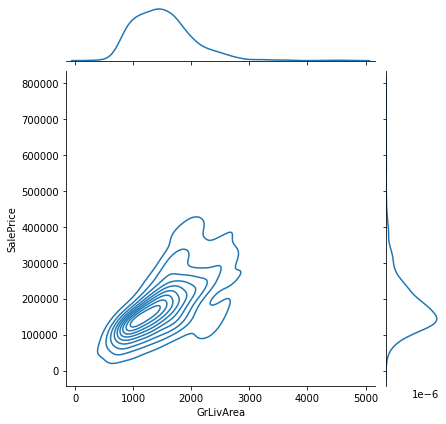

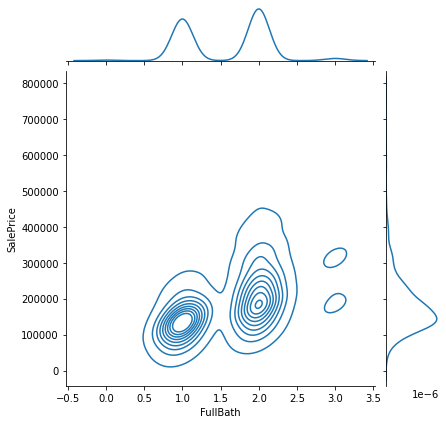

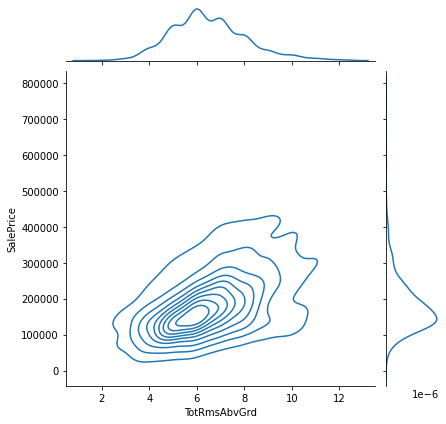

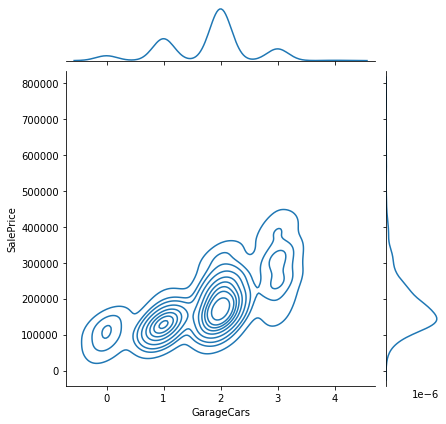

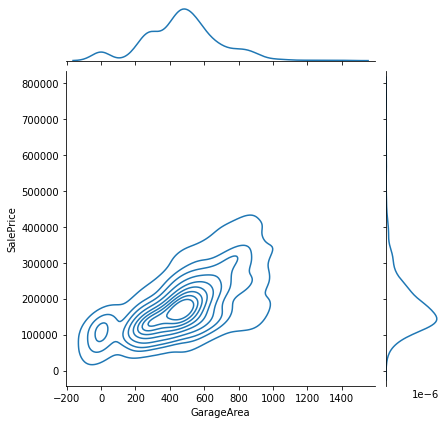

In [804]:
plt.figure(figsize=(10,8))
sns.jointplot(x=train_pr["OverallQual"], y=train_pr["SalePrice"], kind="kde")
sns.jointplot(x=train_pr["YearBuilt"], y=train_pr["SalePrice"], kind="kde")
sns.jointplot(x=train_pr["YearRemodAdd"], y=train_pr["SalePrice"], kind="kde")
sns.jointplot(x=train_pr["TotalBsmtSF"], y=train_pr["SalePrice"], kind="kde")
sns.jointplot(x=train_pr["1stFlrSF"], y=train_pr["SalePrice"], kind="kde")
sns.jointplot(x=train_pr["GrLivArea"], y=train_pr["SalePrice"], kind="kde")
sns.jointplot(x=train_pr["FullBath"], y=train_pr["SalePrice"], kind="kde")
sns.jointplot(x=train_pr["TotRmsAbvGrd"], y=train_pr["SalePrice"], kind="kde")
sns.jointplot(x=train_pr["GarageCars"], y=train_pr["SalePrice"], kind="kde")
sns.jointplot(x=train_pr["GarageArea"], y=train_pr["SalePrice"], kind="kde")
plt.show()

# Scaler

In [805]:
a=train_pr["SalePrice"]

In [806]:
train_pr=train_pr.drop("SalePrice",axis=1)
test_pr=test_pr.drop("SalePrice",axis=1)

In [807]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
C1=list(train_pr.columns)
C2=list(test_pr.columns)
train_pr[C1] = m.fit_transform(train_pr[C1])
test_pr[C2]=m.fit_transform(test_pr[C2])

In [808]:

train_pr=pd.concat([train_pr,a],axis=1)

In [809]:
train_pr.head()

,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,BldgType_TwnhsE,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,SalePrice
0,0.354037,0.048354,0.0,0.0,0.666667,0.5,0.963768,0.916667,0.00000,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,260000.0
1,0.303583,0.081797,0.0,0.0,0.555556,0.5,0.753623,0.433333,0.07500,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,190000.0
2,0.515528,0.057108,0.0,0.0,0.888889,0.5,0.985507,0.983333,0.53750,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,485000.0
3,0.303583,0.006315,0.0,0.0,0.666667,0.5,0.927536,0.833333,0.00000,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,165000.0
4,0.080745,0.017299,0.0,0.0,0.666667,0.5,0.978261,0.966667,0.10375,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,230000.0


In [810]:
train_pr.describe()

,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,BldgType_TwnhsE,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,SalePrice
count,934.000000,934.000000,934.0,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,...,934.000000,934.000000,934.000000,934.000000,934.0,934.000000,934.000000,934.0,934.000000,934.000000
mean,0.302086,0.042796,0.0,0.024625,0.571021,0.569058,0.728757,0.589168,0.067272,0.466809,...,0.082441,0.001071,0.004283,0.990364,0.0,0.002141,0.001071,0.0,0.001071,182981.457173
std,0.128195,0.049234,0.0,0.126515,0.153984,0.139915,0.217827,0.341336,0.114968,0.188461,...,0.275183,0.032721,0.065337,0.097741,0.0,0.046250,0.032721,0.0,0.032721,80613.726628
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,34900.000000
25%,0.242236,0.028979,0.0,0.000000,0.444444,0.500000,0.601449,0.300000,0.000000,0.333333,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,132000.000000
50%,0.303583,0.038571,0.0,0.000000,0.555556,0.500000,0.753623,0.741667,0.000000,0.333333,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,165075.000000
75%,0.360248,0.048351,0.0,0.000000,0.666667,0.625000,0.934783,0.900000,0.106094,0.666667,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,215000.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,755000.000000


# OutLiers

In [811]:
train_pr0=train_pr.copy()

In [812]:
train_pr=train_pr0.copy()

<AxesSubplot:>

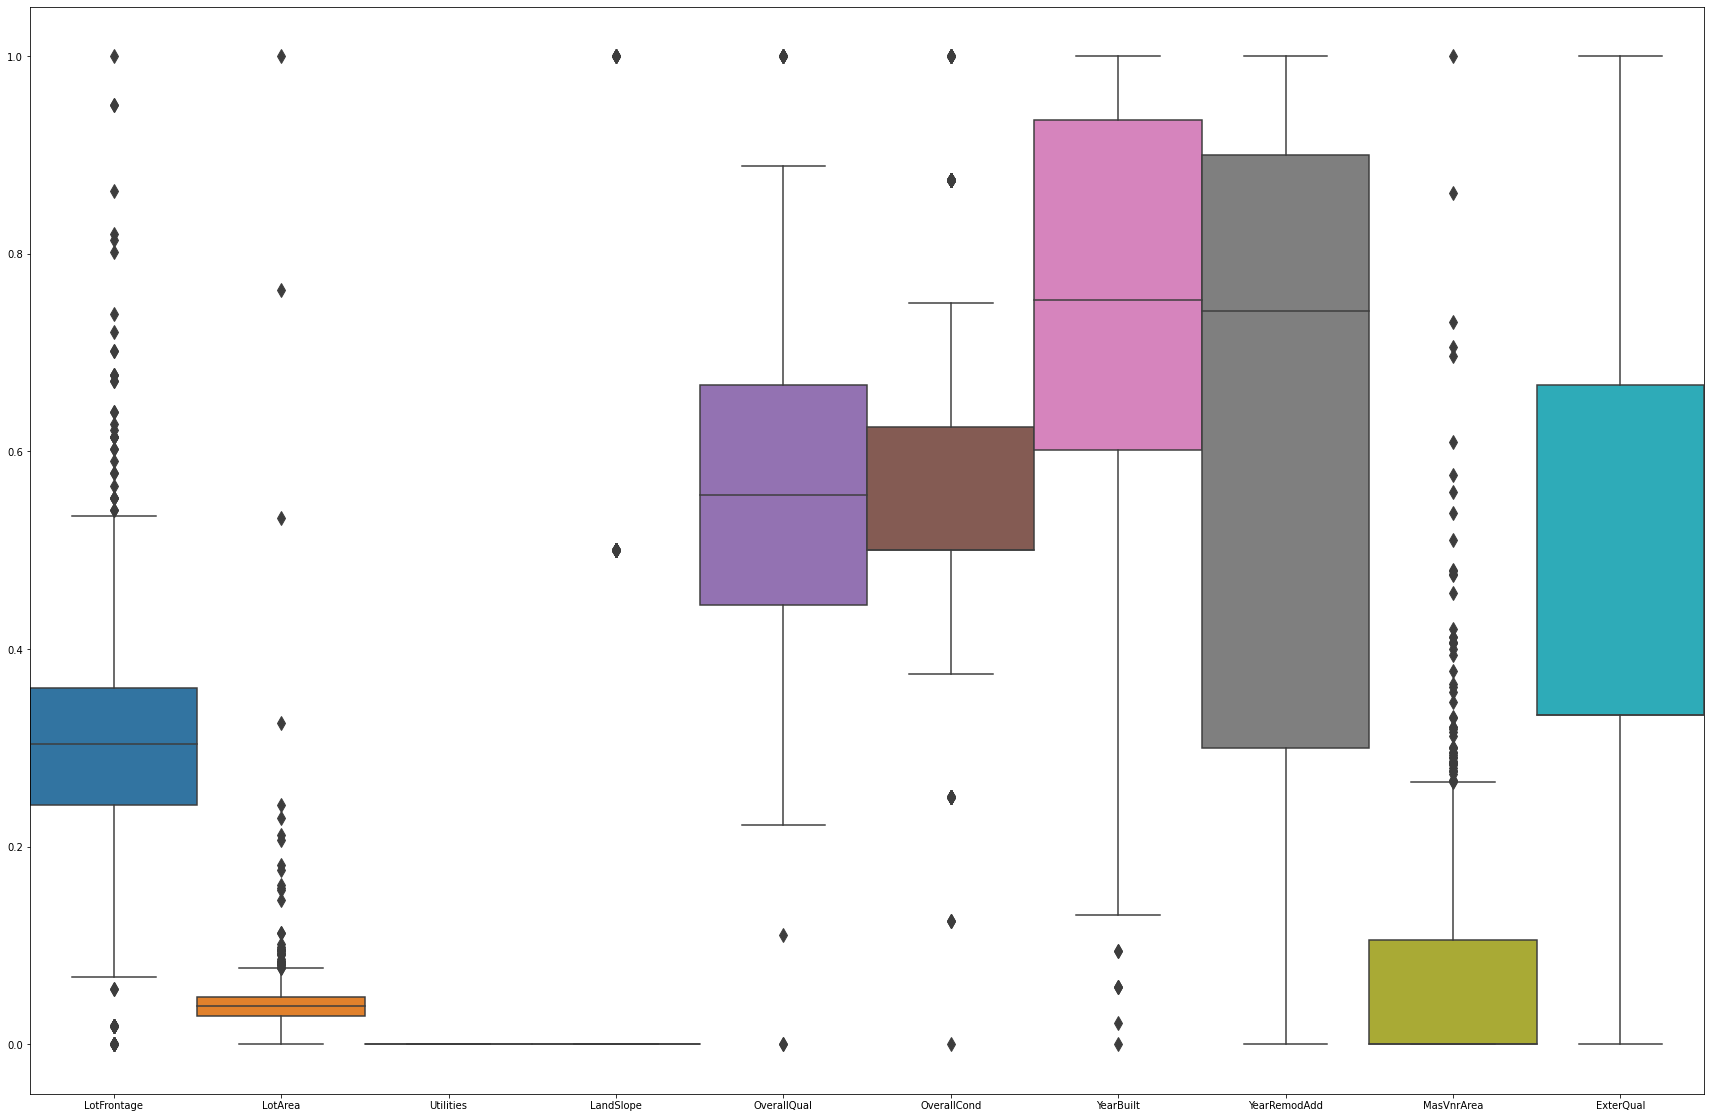

In [813]:
f,ax=plt.subplots(1,1,figsize=(30,20))
sns.boxplot(data=train_pr.iloc[:,:10],fliersize=10,width=1,ax=ax)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LotFrontage'>

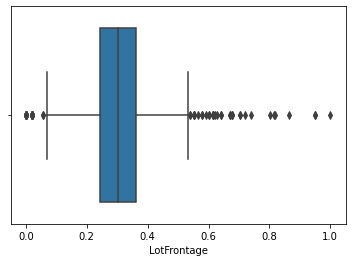

In [814]:
sns.boxplot(train_pr['LotFrontage'])

In [815]:

q1 = train_pr[train_pr['LotFrontage']<1]['LotFrontage'].quantile(0.25)
q3 = train_pr[train_pr['LotFrontage']<1]['LotFrontage'].quantile(0.75)
iqr = q3 - q1
max0 = q3 + (1.5 * iqr)
q1 = train_pr[train_pr['LotFrontage']>0]['LotFrontage'].quantile(0.25)
q3 = train_pr[train_pr['LotFrontage']>0]['LotFrontage'].quantile(0.75)
iqr = q3 - q1
min0 = q1 - (1.5 * iqr)

def out1(x):
    if x>=max0 or x<=min0:
        return (train_pr["LotFrontage"].median())
    else:
        return x
train_pr["LotFrontage"]=train_pr["LotFrontage"].apply(lambda x: out1(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LotFrontage'>

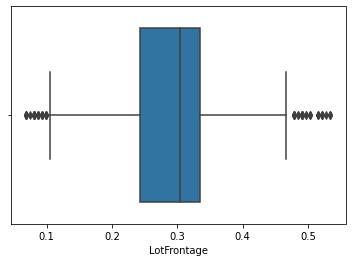

In [816]:
sns.boxplot(train_pr['LotFrontage'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LotArea'>

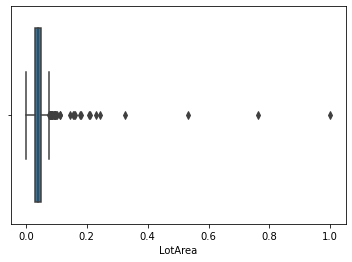

In [817]:
sns.boxplot(train_pr['LotArea'])

In [818]:
q1 = train_pr[train_pr['LotArea']<1]['LotArea'].quantile(0.25)
q3 = train_pr[train_pr['LotArea']<1]['LotArea'].quantile(0.75)
iqr = q3 - q1
max1 = q3 + (1.5 * iqr)
q1 = train_pr[train_pr['LotArea']>0]['LotArea'].quantile(0.25)
q3 = train_pr[train_pr['LotArea']>0]['LotArea'].quantile(0.75)
iqr = q3 - q1
min1 = q1 - (1.5 * iqr)

def out2(x):
    if x>=max1 or x<=min1:
        return (train_pr["LotArea"].median())
    else:
        return x
train_pr["LotArea"]=train_pr["LotArea"].apply(lambda x: out2(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='LotArea'>

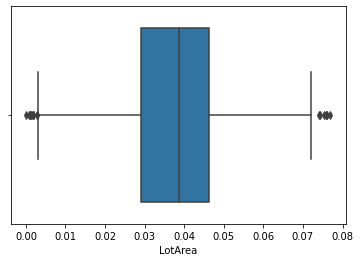

In [819]:
sns.boxplot(train_pr['LotArea'])

<AxesSubplot:>

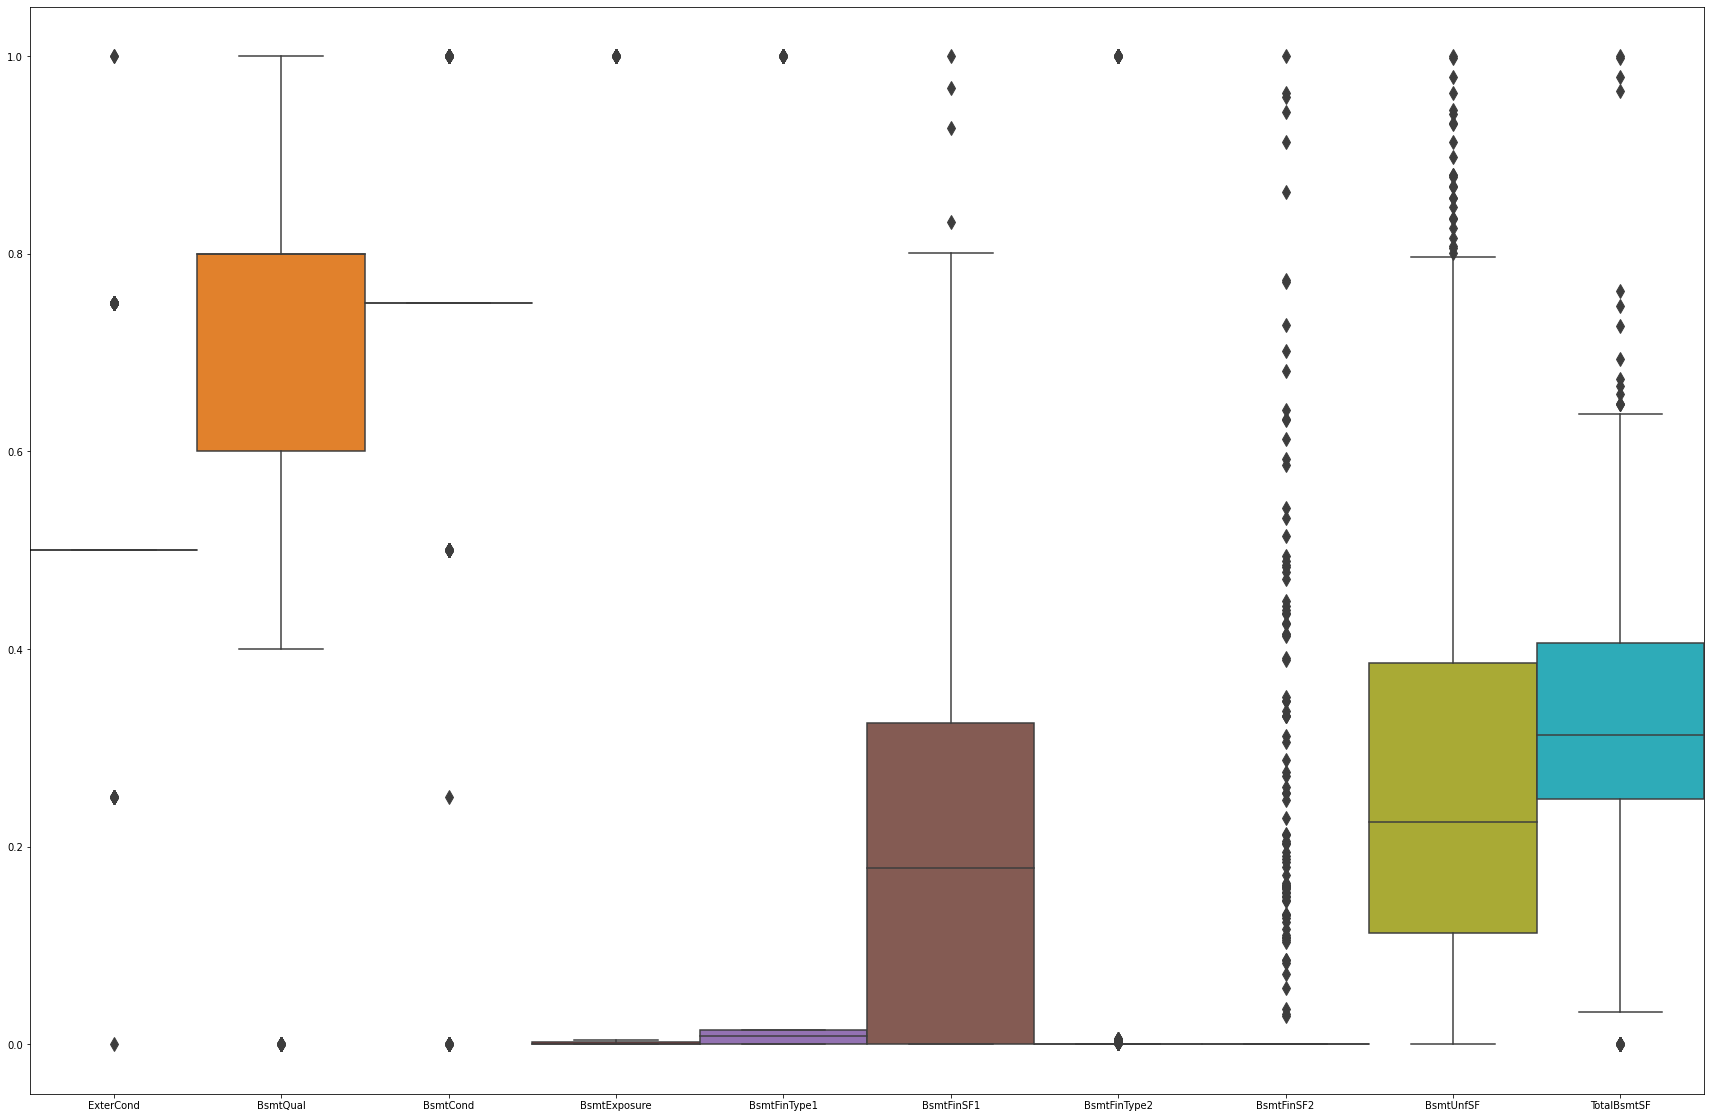

In [820]:
f,ax=plt.subplots(1,1,figsize=(30,20))
sns.boxplot(data=train_pr.iloc[:,10:20],fliersize=10,width=1,ax=ax)

<AxesSubplot:>

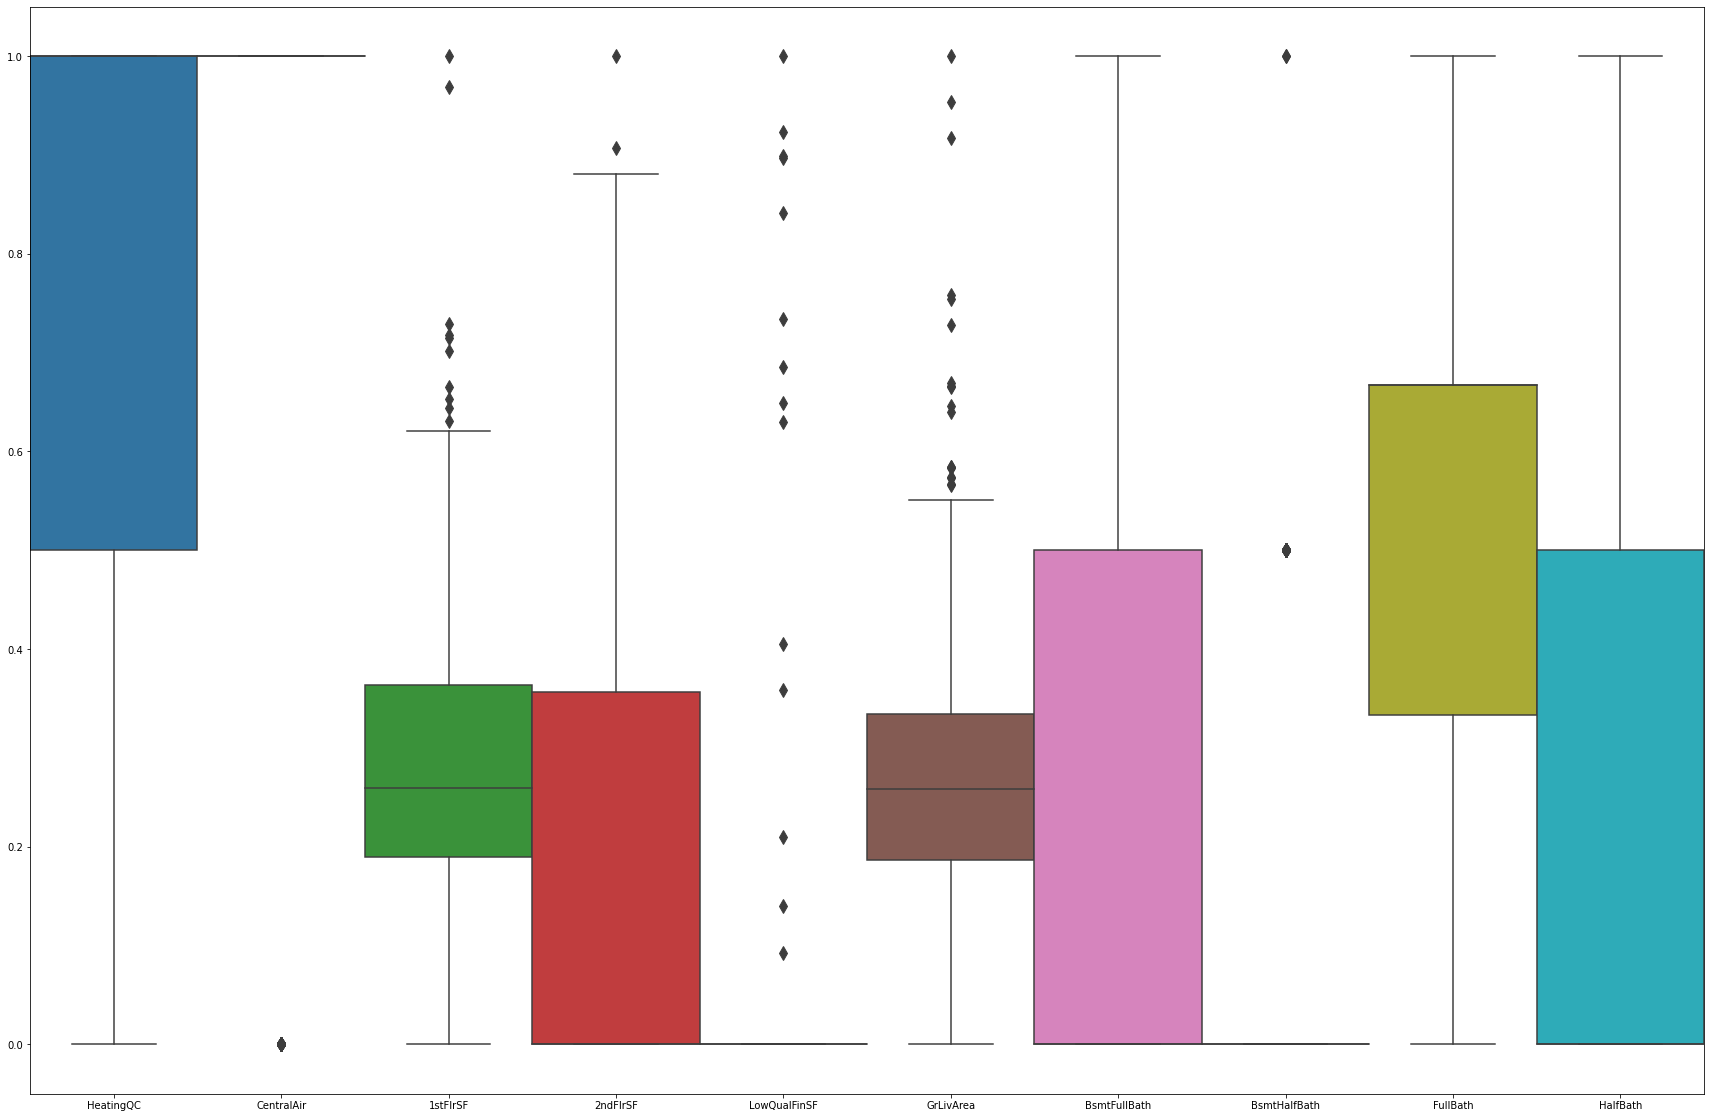

In [821]:
f,ax=plt.subplots(1,1,figsize=(30,20))
sns.boxplot(data=train_pr.iloc[:,20:30],fliersize=10,width=1,ax=ax)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MasVnrArea'>

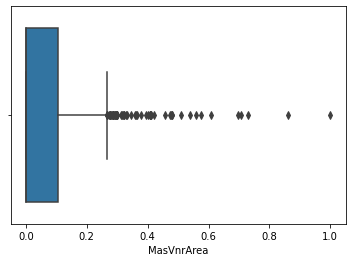

In [822]:
sns.boxplot(train_pr['MasVnrArea'])

In [823]:
q1 = train_pr[train_pr['MasVnrArea']<1]['MasVnrArea'].quantile(0.25)
q3 = train_pr[train_pr['MasVnrArea']<1]['MasVnrArea'].quantile(0.75)
iqr = q3 - q1
max2 = q3 + (1.5 * iqr)

def out3(x):
    if x>=max2 :
        return (train_pr["MasVnrArea"].median())
    else:
        return x
train_pr["MasVnrArea"]=train_pr["MasVnrArea"].apply(lambda x: out3(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MasVnrArea'>

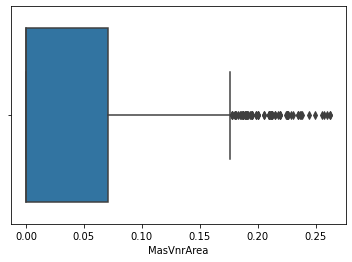

In [824]:
sns.boxplot(train_pr['MasVnrArea'])

<AxesSubplot:>

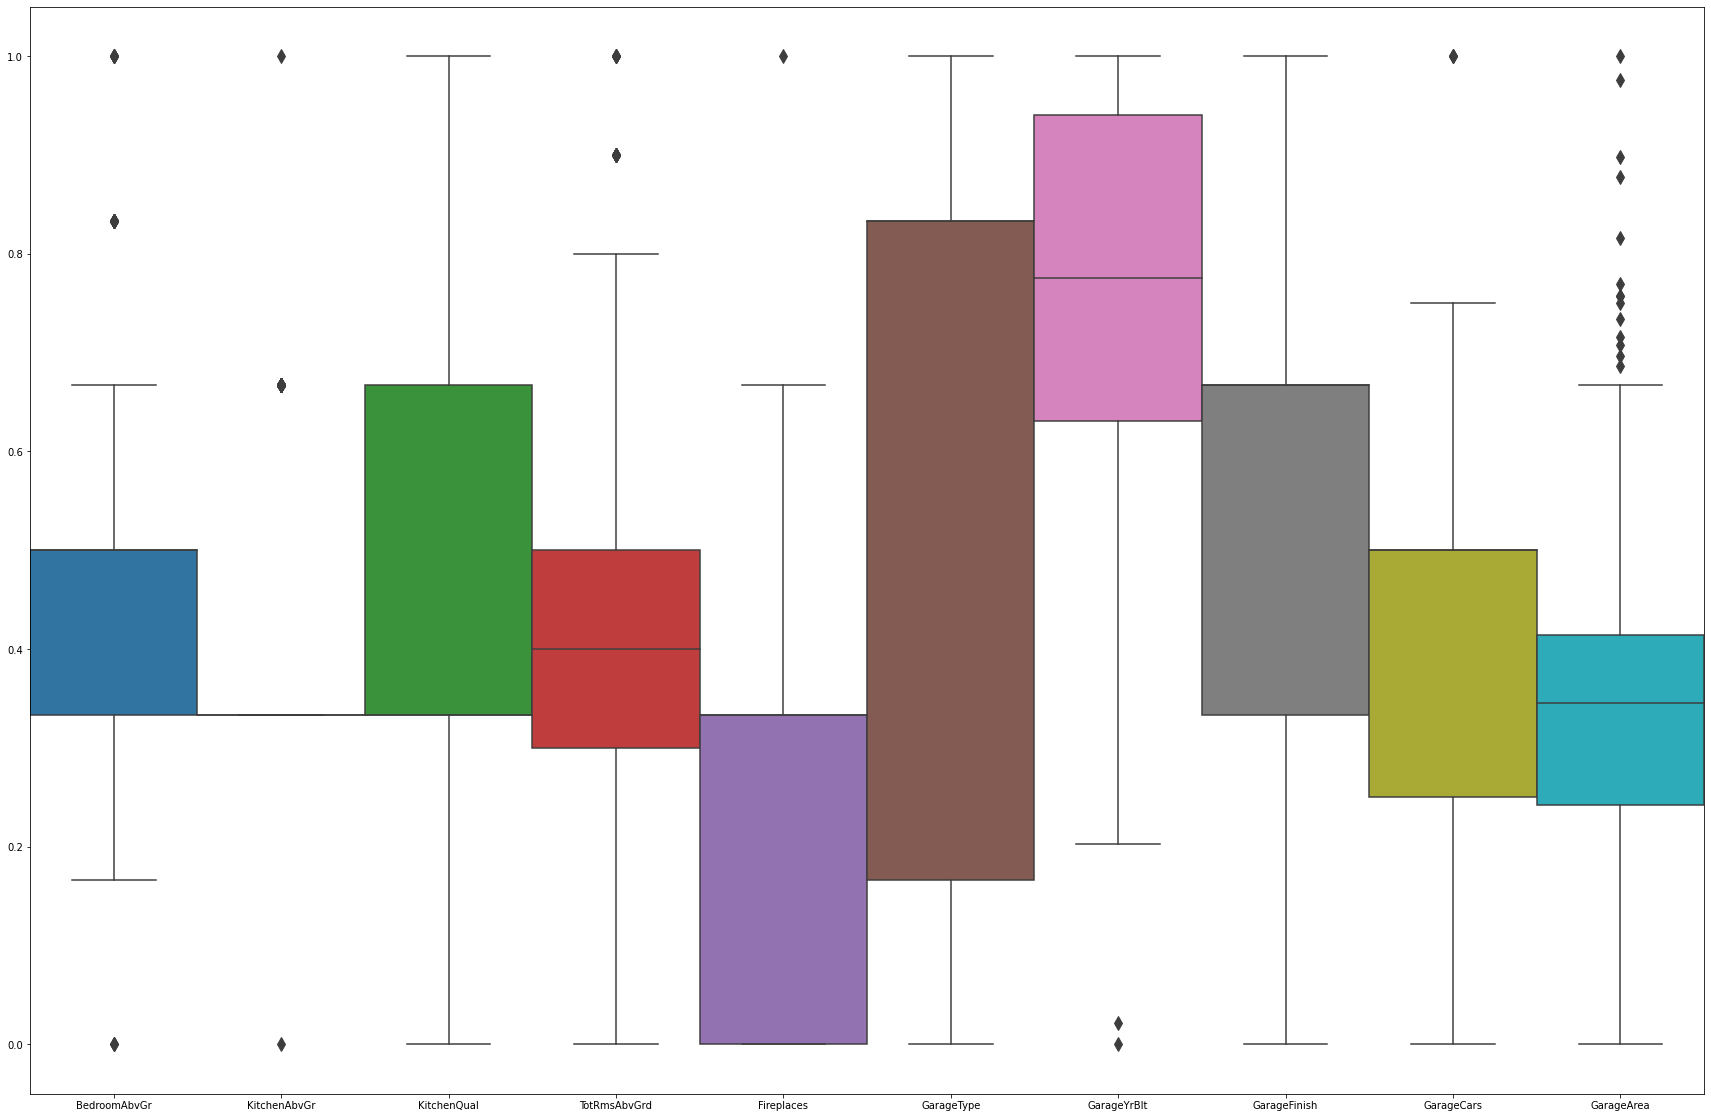

In [825]:
f,ax=plt.subplots(1,1,figsize=(30,20))
sns.boxplot(data=train_pr.iloc[:,30:40],fliersize=10,width=1,ax=ax)

In [826]:
train_pr.columns

Index(['LotFrontage', 'LotArea', 'Utilities', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'BldgType_TwnhsE', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'SalePrice'],
      dtype='object', length=245)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtFinSF1'>

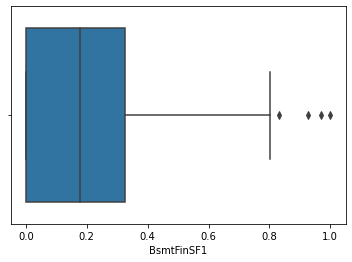

In [827]:
sns.boxplot(train_pr['BsmtFinSF1'])

In [828]:
q1 = train_pr[train_pr['BsmtFinSF1']<1]['BsmtFinSF1'].quantile(0.25)
q3 = train_pr[train_pr['BsmtFinSF1']<1]['BsmtFinSF1'].quantile(0.75)
iqr = q3 - q1
max3 = q3 + (1.5 * iqr)

def out4(x):
    if x>=max3 :
        return (train_pr["BsmtFinSF1"].median())
    else:
        return x
train_pr["BsmtFinSF1"]=train_pr["BsmtFinSF1"].apply(lambda x: out4(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtFinSF1'>

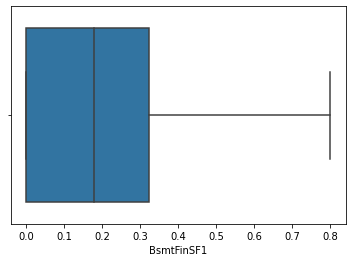

In [829]:
sns.boxplot(train_pr['BsmtFinSF1'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtFinSF2'>

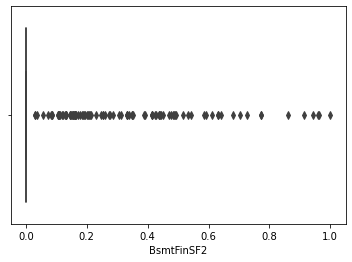

In [830]:

sns.boxplot(train_pr['BsmtFinSF2'])

In [831]:
q1 = train_pr[train_pr['BsmtFinSF2']<1]['BsmtFinSF2'].quantile(0.25)
q3 = train_pr[train_pr['BsmtFinSF2']<1]['BsmtFinSF2'].quantile(0.75)
iqr = q3 - q1
max4 = q3 + (1.5 * iqr)

def out5(x):
    if x>=max4 :
        return (train_pr["BsmtFinSF2"].median())
    else:
        return x
train_pr["BsmtFinSF2"]=train_pr["BsmtFinSF2"].apply(lambda x: out5(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtFinSF2'>

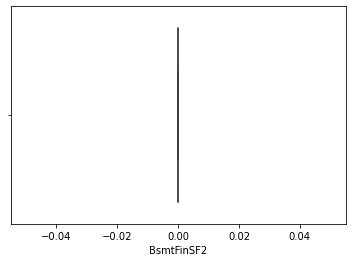

In [832]:

sns.boxplot(train_pr['BsmtFinSF2'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtUnfSF'>

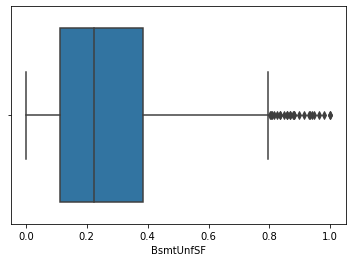

In [833]:

sns.boxplot(train_pr['BsmtUnfSF'])

In [834]:
q1 = train_pr[train_pr['BsmtUnfSF']<1]['BsmtUnfSF'].quantile(0.25)
q3 = train_pr[train_pr['BsmtUnfSF']<1]['BsmtUnfSF'].quantile(0.75)
iqr = q3 - q1
max5 = q3 + (1.5 * iqr)

def out6(x):
    if x>=max5 :
        return (train_pr["BsmtUnfSF"].median())
    else:
        return x
train_pr["BsmtUnfSF"]=train_pr["BsmtUnfSF"].apply(lambda x: out6(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BsmtUnfSF'>

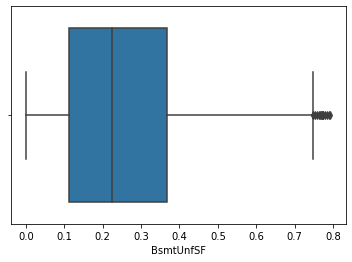

In [835]:
sns.boxplot(train_pr['BsmtUnfSF'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TotalBsmtSF'>

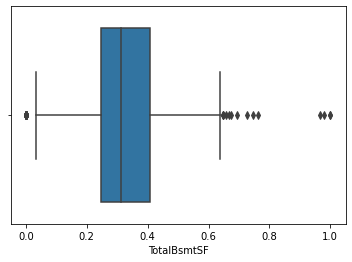

In [836]:
sns.boxplot(train_pr['TotalBsmtSF'])

In [837]:
q1 = train_pr[train_pr['TotalBsmtSF']<1]['TotalBsmtSF'].quantile(0.25)
q3 = train_pr[train_pr['TotalBsmtSF']<1]['TotalBsmtSF'].quantile(0.75)
iqr = q3 - q1
max6 = q3 + (1.5 * iqr)
q1 = train_pr[train_pr['TotalBsmtSF']>0]['TotalBsmtSF'].quantile(0.25)
q3 = train_pr[train_pr['TotalBsmtSF']>0]['TotalBsmtSF'].quantile(0.75)
iqr = q3 - q1
min6 = q1 - (1.5 * iqr)

def out7(x):
    if x>=max6 or x<=min6:
        return (train_pr["TotalBsmtSF"].median())
    else:
        return x
train_pr["TotalBsmtSF"]=train_pr["TotalBsmtSF"].apply(lambda x: out7(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TotalBsmtSF'>

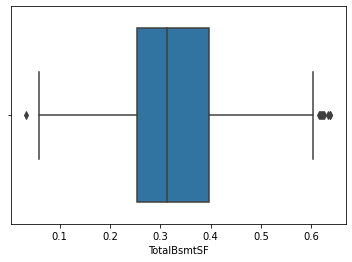

In [838]:
sns.boxplot(train_pr['TotalBsmtSF'])

<AxesSubplot:>

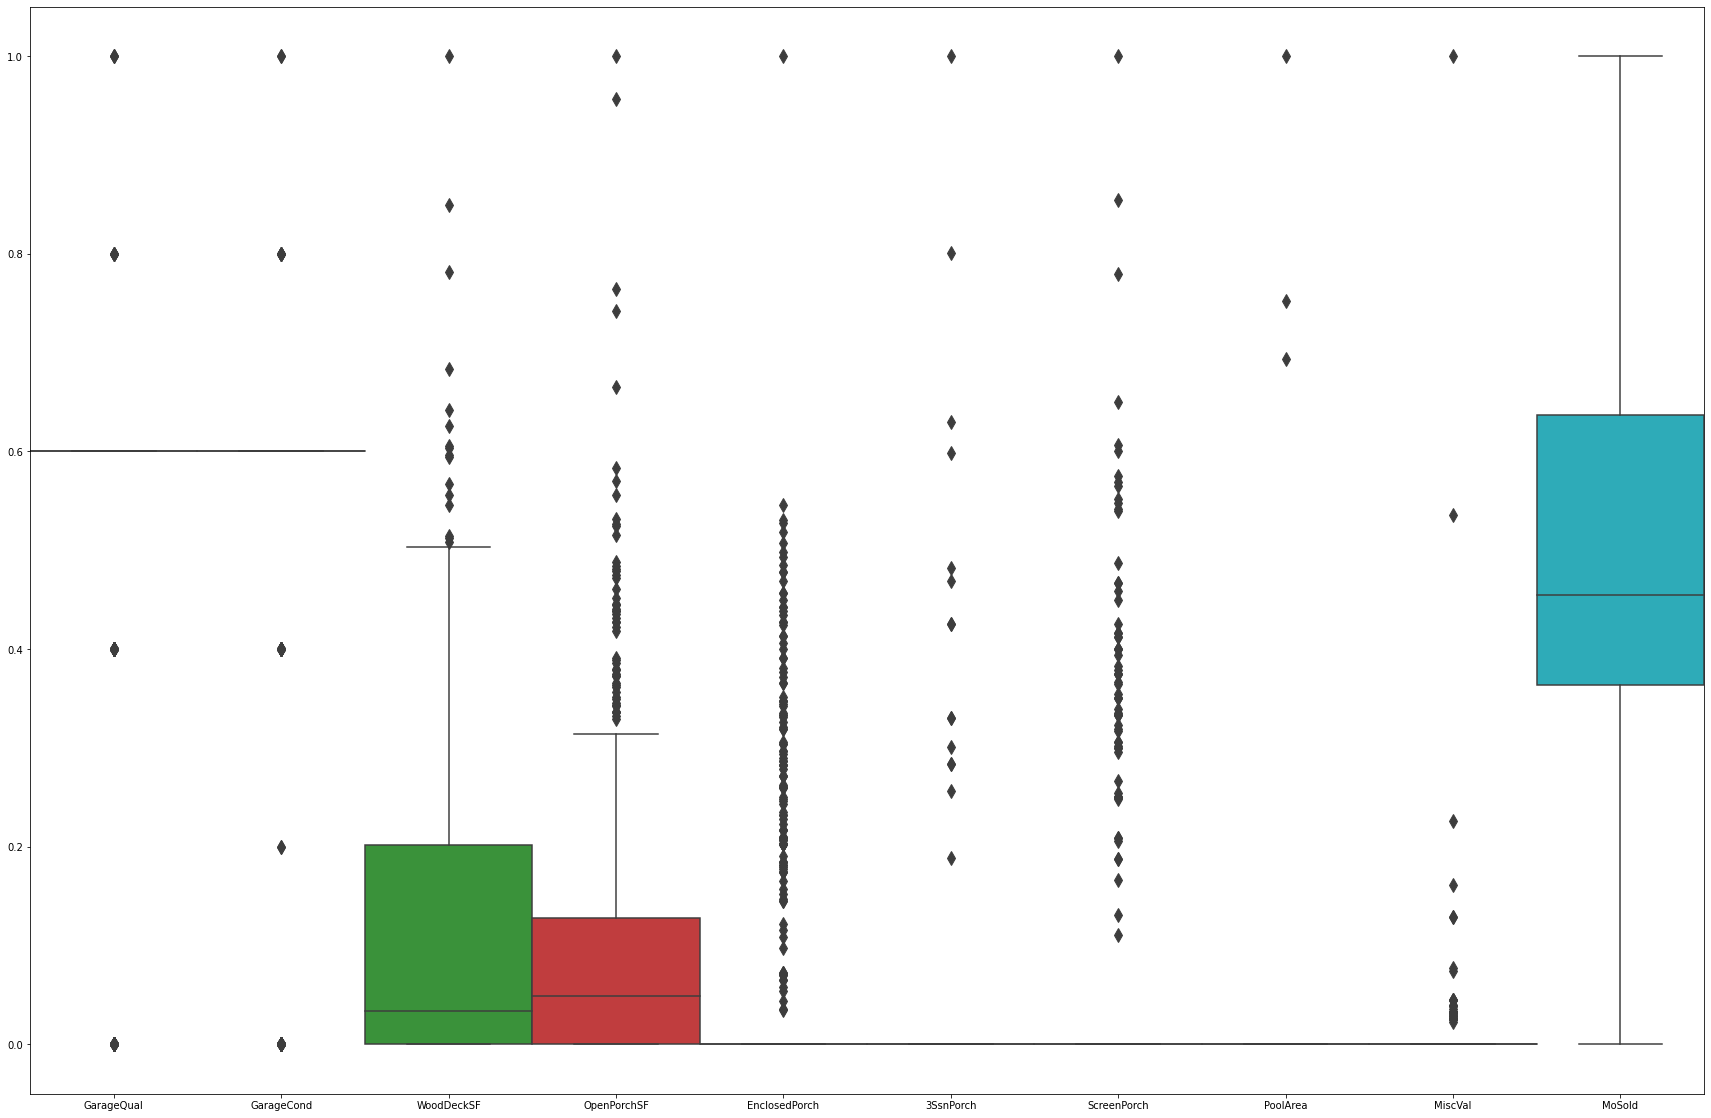

In [839]:
f,ax=plt.subplots(1,1,figsize=(30,20))
sns.boxplot(data=train_pr.iloc[:,40:50],fliersize=10,width=1,ax=ax)

In [840]:
list(train_pr.columns)[40:51]

['GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='1stFlrSF'>

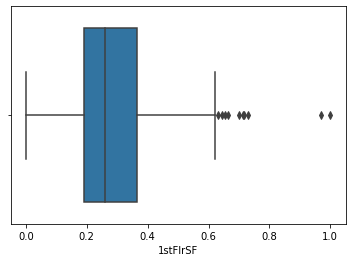

In [841]:
sns.boxplot(train_pr['1stFlrSF'])

In [842]:
q1 = train_pr[train_pr['1stFlrSF']<1]['1stFlrSF'].quantile(0.25)
q3 = train_pr[train_pr['1stFlrSF']<1]['1stFlrSF'].quantile(0.75)
iqr = q3 - q1
max7 = q3 + (1.5 * iqr)

def out8(x):
    if x>=max7 :
        return (train_pr["1stFlrSF"].median())
    else:
        return x
train_pr["1stFlrSF"]=train_pr["1stFlrSF"].apply(lambda x: out8(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='2ndFlrSF'>

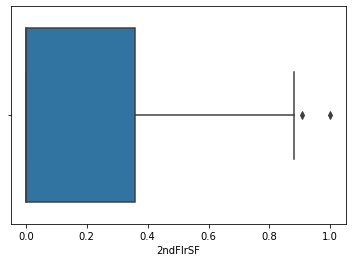

In [843]:
sns.boxplot(train_pr['2ndFlrSF'])

In [844]:
q1 = train_pr[train_pr['2ndFlrSF']<1]['2ndFlrSF'].quantile(0.25)
q3 = train_pr[train_pr['2ndFlrSF']<1]['2ndFlrSF'].quantile(0.75)
iqr = q3 - q1
max8 = q3 + (1.5 * iqr)

def out9(x):
    if x>=max8 :
        return (train_pr["2ndFlrSF"].median())
    else:
        return x
train_pr["2ndFlrSF"]=train_pr["2ndFlrSF"].apply(lambda x: out9(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='2ndFlrSF'>

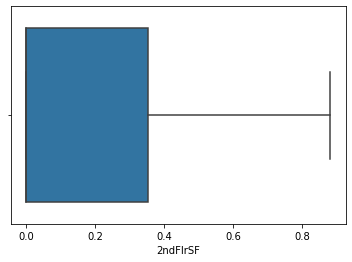

In [845]:
sns.boxplot(train_pr['2ndFlrSF'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea'>

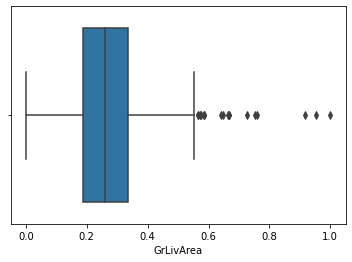

In [846]:
sns.boxplot(train_pr['GrLivArea'])

In [847]:
q1 = train_pr[train_pr['GrLivArea']<1]['GrLivArea'].quantile(0.25)
q3 = train_pr[train_pr['GrLivArea']<1]['GrLivArea'].quantile(0.75)
iqr = q3 - q1
max9 = q3 + (1.5 * iqr)

def out10(x):
    if x>=max9 :
        return (train_pr["GrLivArea"].median())
    else:
        return x
train_pr["GrLivArea"]=train_pr["GrLivArea"].apply(lambda x: out10(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea'>

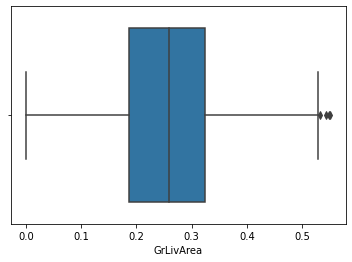

In [848]:
sns.boxplot(train_pr['GrLivArea'])

<AxesSubplot:>

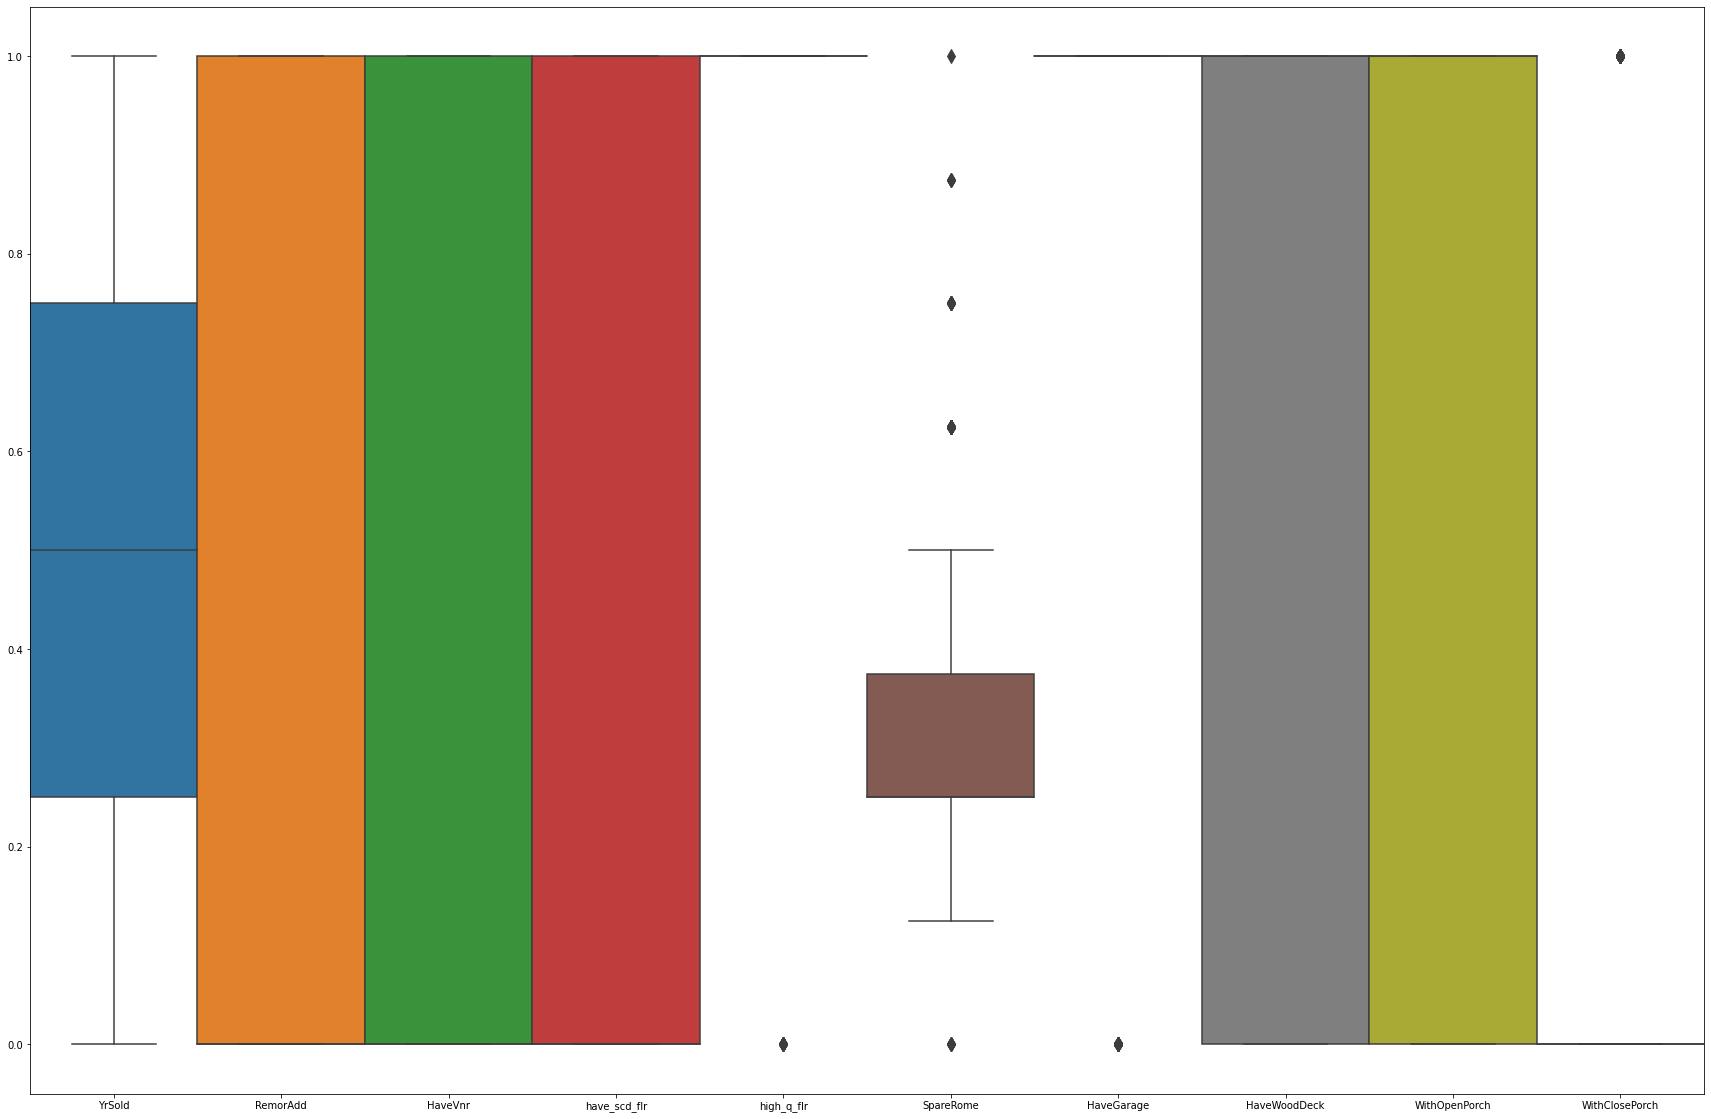

In [849]:
f,ax=plt.subplots(1,1,figsize=(30,20))
sns.boxplot(data=train_pr.iloc[:,50:60],fliersize=10,width=1,ax=ax)

In [850]:
list(train_pr.columns)[50:61]

['YrSold',
 'RemorAdd',
 'HaveVnr',
 'have_scd_flr',
 'high_q_flr',
 'SpareRome',
 'HaveGarage',
 'HaveWoodDeck',
 'WithOpenPorch',
 'WithClosePorch',
 'With3SsnPorch']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GarageArea'>

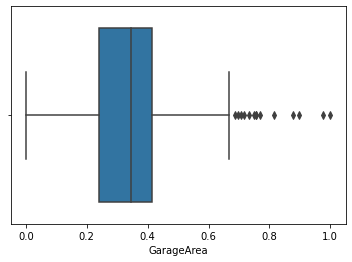

In [851]:
sns.boxplot(train_pr['GarageArea'])

In [852]:
q1 = train_pr[train_pr['GarageArea']<1]['GarageArea'].quantile(0.25)
q3 = train_pr[train_pr['GarageArea']<1]['GarageArea'].quantile(0.75)
iqr = q3 - q1
max10 = q3 + (1.5 * iqr)

def out11(x):
    if x>=max10 :
        return (train_pr["GarageArea"].median())
    else:
        return x
train_pr["GarageArea"]=train_pr["GarageArea"].apply(lambda x: out11(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GarageArea'>

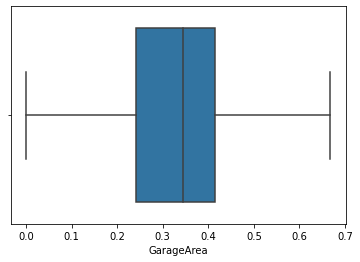

In [853]:
sns.boxplot(train_pr['GarageArea'])

<AxesSubplot:>

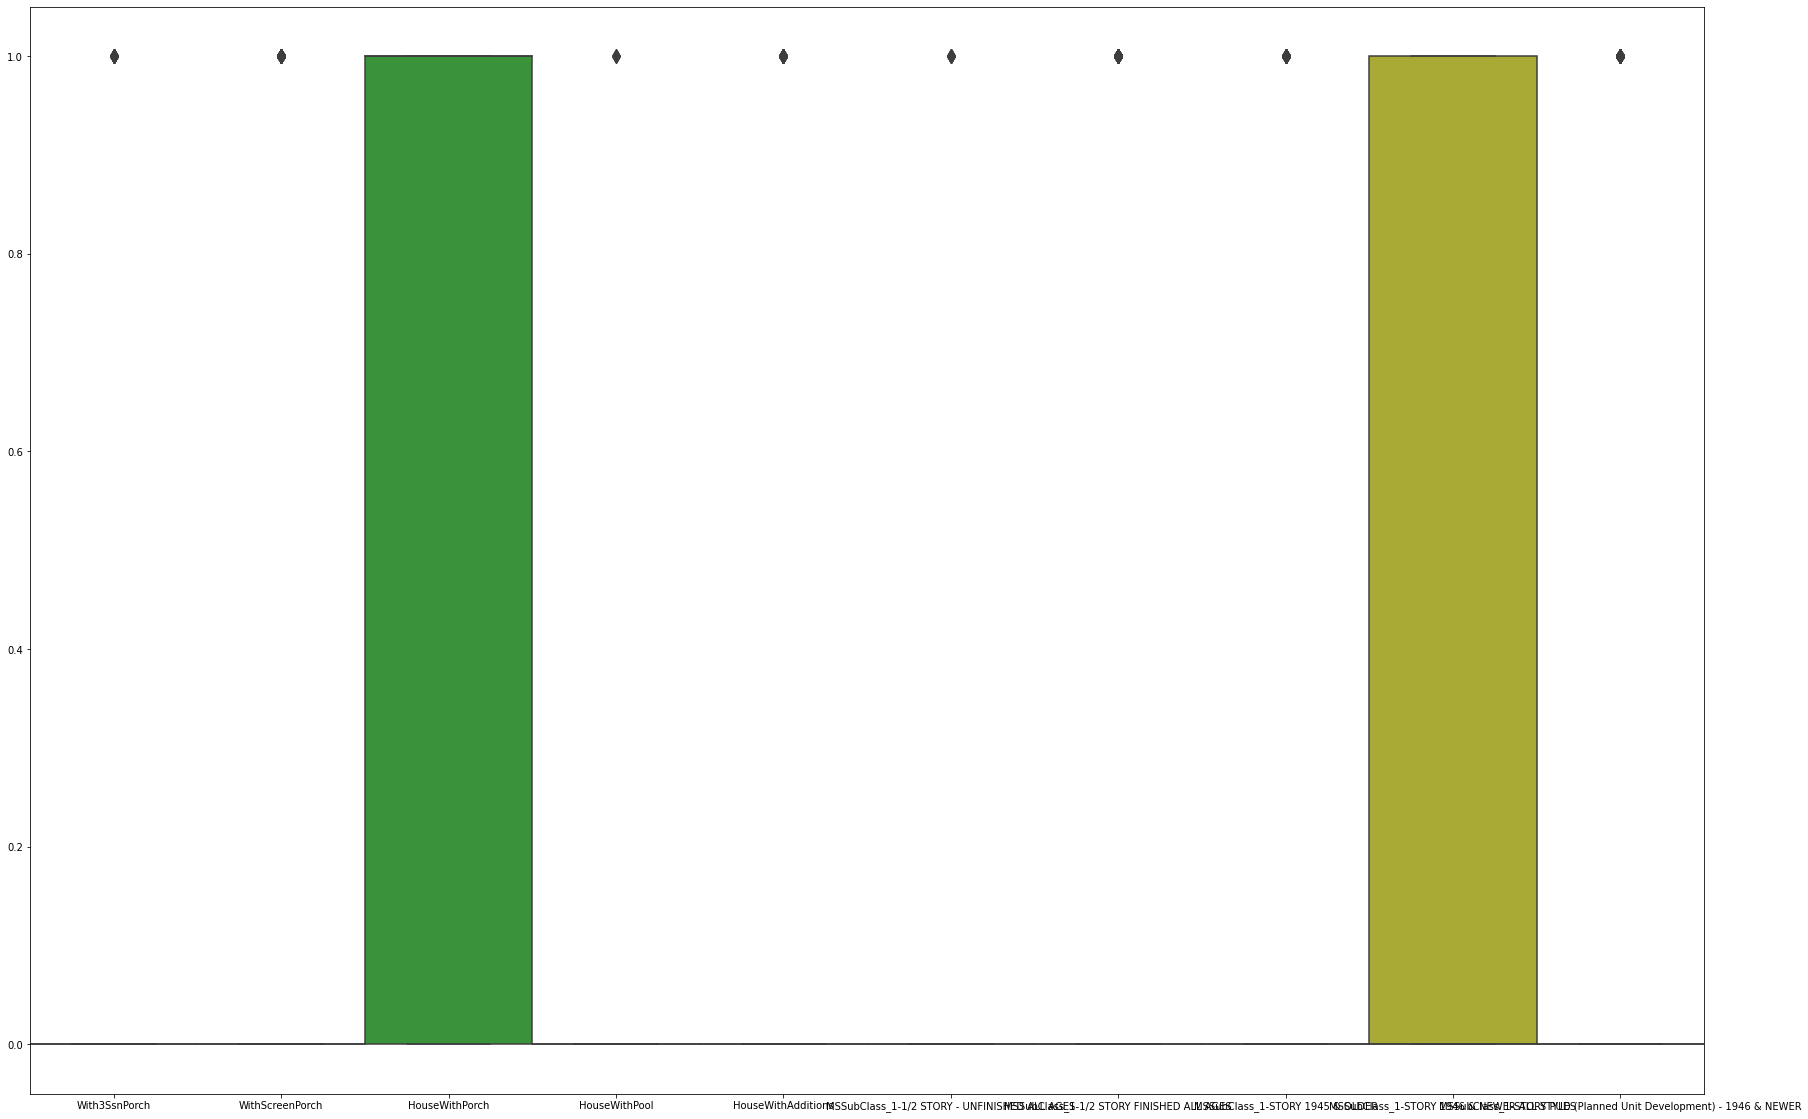

In [854]:
f,ax=plt.subplots(1,1,figsize=(30,20))
sns.boxplot(data=train_pr.iloc[:,60:70],fliersize=10,width=1,ax=ax)

In [855]:
list(train_pr.columns)[60:70]

['With3SsnPorch',
 'WithScreenPorch',
 'HouseWithPorch',
 'HouseWithPool',
 'HouseWithAdditions',
 'MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='WoodDeckSF'>

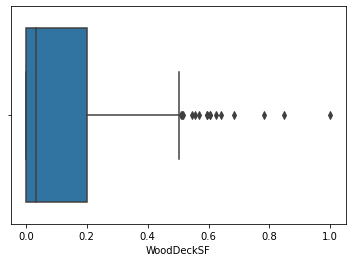

In [856]:
sns.boxplot(train_pr['WoodDeckSF'])

In [857]:
q1 = train_pr[train_pr['WoodDeckSF']<1]['WoodDeckSF'].quantile(0.25)
q3 = train_pr[train_pr['WoodDeckSF']<1]['WoodDeckSF'].quantile(0.75)
iqr = q3 - q1
max11 = q3 + (1.5 * iqr)

def out12(x):
    if x>=max11 :
        return (train_pr["WoodDeckSF"].median())
    else:
        return x
train_pr["WoodDeckSF"]=train_pr["WoodDeckSF"].apply(lambda x: out12(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='WoodDeckSF'>

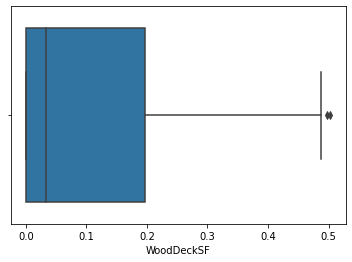

In [858]:
sns.boxplot(train_pr['WoodDeckSF'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OpenPorchSF'>

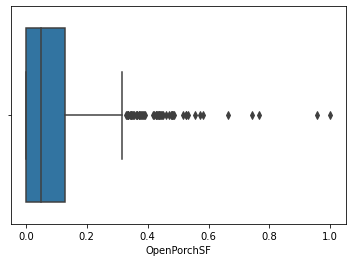

In [859]:
sns.boxplot(train_pr['OpenPorchSF'])

In [860]:
q1 = train_pr[train_pr['OpenPorchSF']<1]['OpenPorchSF'].quantile(0.25)
q3 = train_pr[train_pr['OpenPorchSF']<1]['OpenPorchSF'].quantile(0.75)
iqr = q3 - q1
max12 = q3 + (1.5 * iqr)

def out13(x):
    if x>=max12 :
        return (train_pr["OpenPorchSF"].median())
    else:
        return x
train_pr["OpenPorchSF"]=train_pr["OpenPorchSF"].apply(lambda x: out13(x))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='OpenPorchSF'>

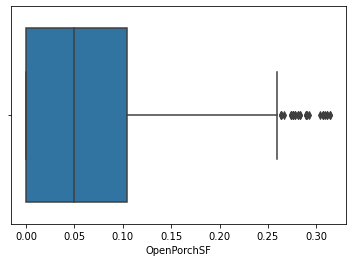

In [861]:
sns.boxplot(train_pr['OpenPorchSF'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='EnclosedPorch'>

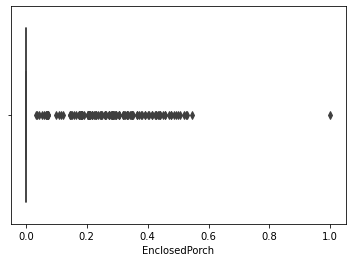

In [862]:
sns.boxplot(train_pr['EnclosedPorch'])

In [863]:
"""q1 = train_pr[train_pr['EnclosedPorch']<1]['EnclosedPorch'].quantile(0.25)
q3 = train_pr[train_pr['EnclosedPorch']<1]['EnclosedPorch'].quantile(0.75)
iqr = q3 - q1
max13 = q3 + (1.5 * iqr)

def out14(x):
    if x>=max13 :
        return (train_pr["EnclosedPorch"].median())
    else:
        return x
train_pr["EnclosedPorch"]=train_pr["EnclosedPorch"].apply(lambda x: out14(x))"""

'q1 = train_pr[train_pr[\'EnclosedPorch\']<1][\'EnclosedPorch\'].quantile(0.25)\nq3 = train_pr[train_pr[\'EnclosedPorch\']<1][\'EnclosedPorch\'].quantile(0.75)\niqr = q3 - q1\nmax13 = q3 + (1.5 * iqr)\n\ndef out14(x):\n    if x>=max13 :\n        return (train_pr["EnclosedPorch"].median())\n    else:\n        return x\ntrain_pr["EnclosedPorch"]=train_pr["EnclosedPorch"].apply(lambda x: out14(x))'

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='EnclosedPorch'>

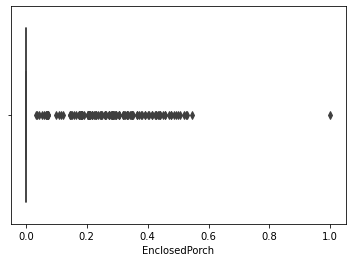

In [864]:
sns.boxplot(train_pr['EnclosedPorch'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='3SsnPorch'>

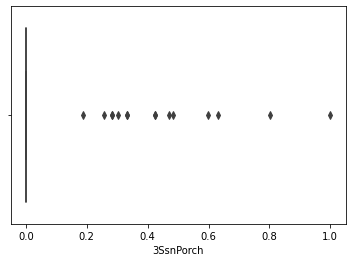

In [865]:
sns.boxplot(train_pr['3SsnPorch'])

In [866]:
"""q1 = train_pr[train_pr['3SsnPorch']<1]['3SsnPorch'].quantile(0.25)
q3 = train_pr[train_pr['3SsnPorch']<1]['3SsnPorch'].quantile(0.75)
iqr = q3 - q1
max14 = q3 + (1.5 * iqr)

def out15(x):
    if x>=max14 :
        return (train_pr["3SsnPorch"].())
    else:
        return x
train_pr["3SsnPorch"]=train_pr["3SsnPorch"].apply(lambda x: out15(x))"""

'q1 = train_pr[train_pr[\'3SsnPorch\']<1][\'3SsnPorch\'].quantile(0.25)\nq3 = train_pr[train_pr[\'3SsnPorch\']<1][\'3SsnPorch\'].quantile(0.75)\niqr = q3 - q1\nmax14 = q3 + (1.5 * iqr)\n\ndef out15(x):\n    if x>=max14 :\n        return (train_pr["3SsnPorch"].())\n    else:\n        return x\ntrain_pr["3SsnPorch"]=train_pr["3SsnPorch"].apply(lambda x: out15(x))'

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='3SsnPorch'>

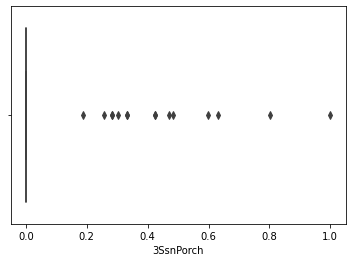

In [867]:
sns.boxplot(train_pr['3SsnPorch'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ScreenPorch'>

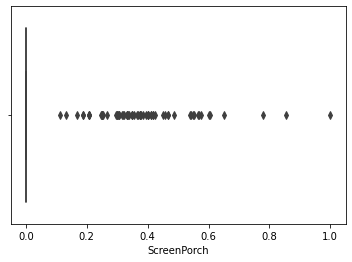

In [868]:

sns.boxplot(train_pr['ScreenPorch'])

In [869]:
"""q1 = train_pr[train_pr['ScreenPorch']<1]['ScreenPorch'].quantile(0.25)
q3 = train_pr[train_pr['ScreenPorch']<1]['ScreenPorch'].quantile(0.75)
iqr = q3 - q1
max15 = q3 + (1.5 * iqr)

def out16(x):
    if x>=max15 :
        return (train_pr["ScreenPorch"].mean())
    else:
        return x
train_pr["ScreenPorch"]=train_pr["ScreenPorch"].apply(lambda x: out16(x))"""

'q1 = train_pr[train_pr[\'ScreenPorch\']<1][\'ScreenPorch\'].quantile(0.25)\nq3 = train_pr[train_pr[\'ScreenPorch\']<1][\'ScreenPorch\'].quantile(0.75)\niqr = q3 - q1\nmax15 = q3 + (1.5 * iqr)\n\ndef out16(x):\n    if x>=max15 :\n        return (train_pr["ScreenPorch"].mean())\n    else:\n        return x\ntrain_pr["ScreenPorch"]=train_pr["ScreenPorch"].apply(lambda x: out16(x))'

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ScreenPorch'>

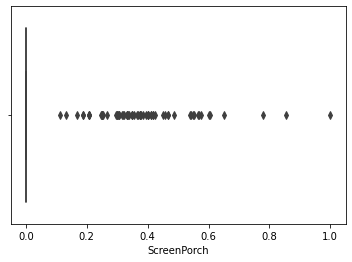

In [870]:

sns.boxplot(train_pr['ScreenPorch'])

<AxesSubplot:>

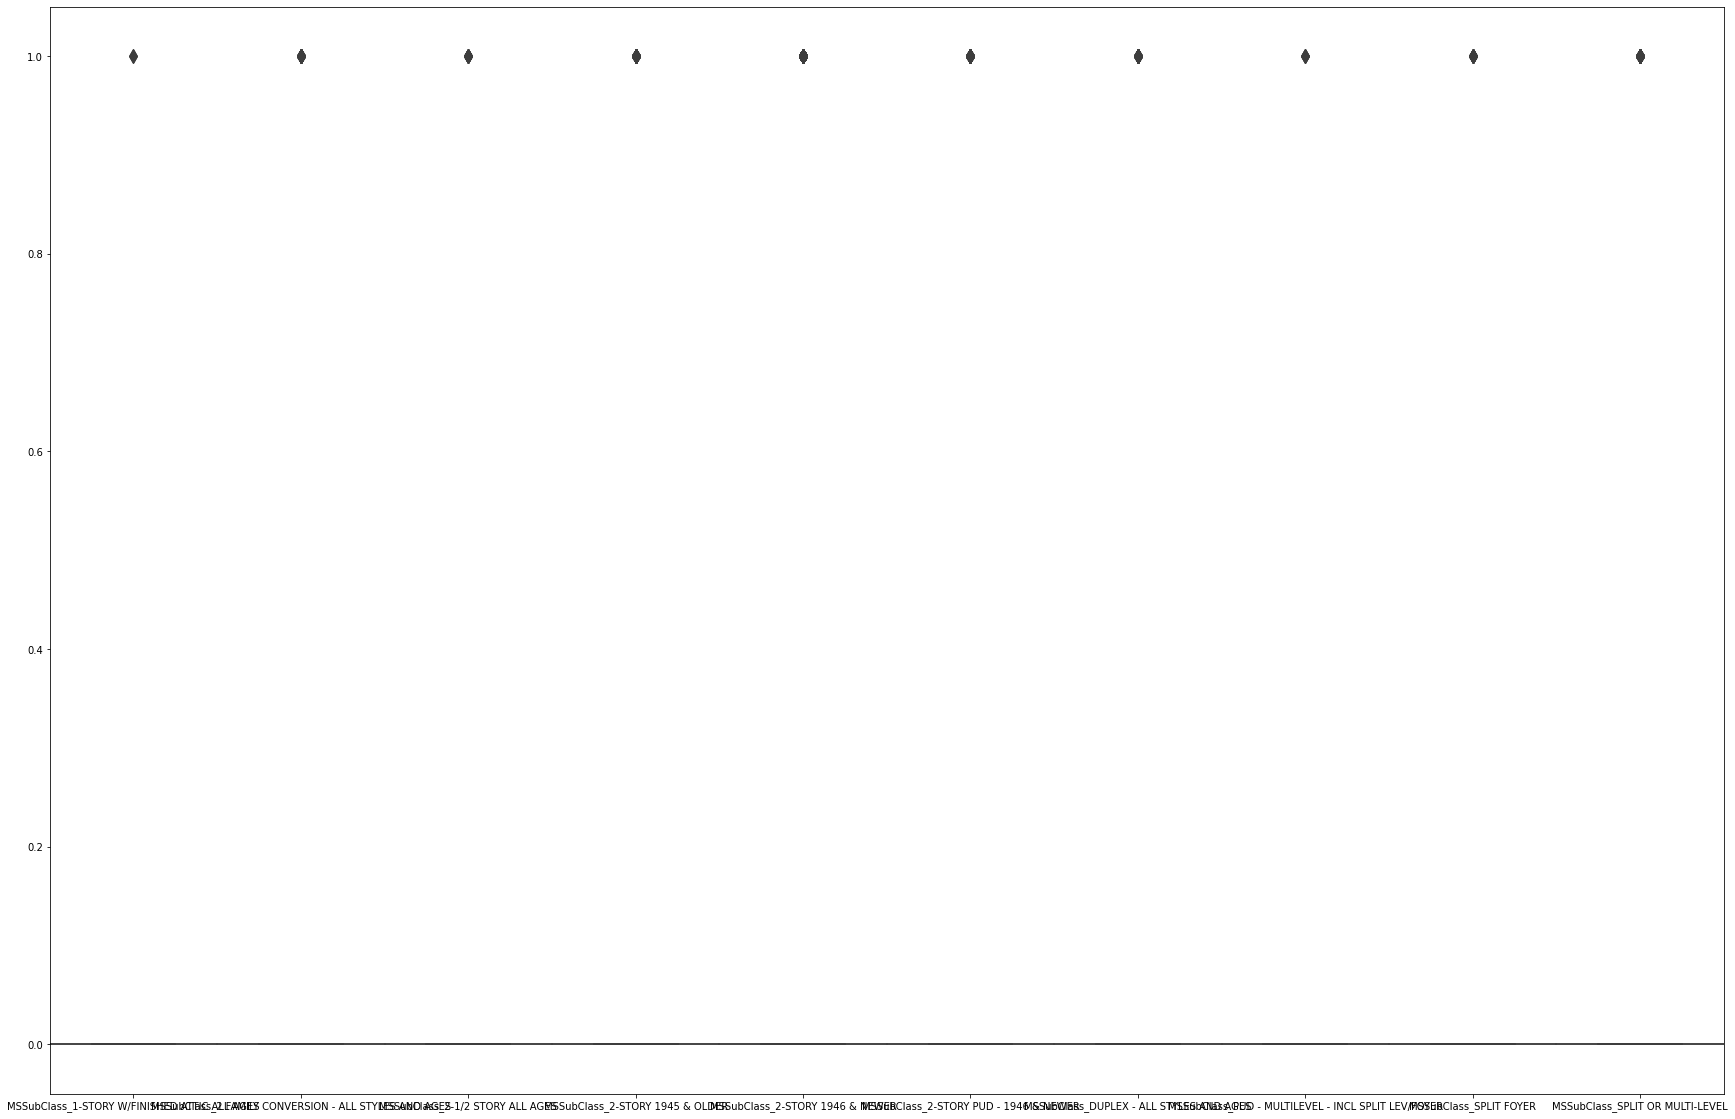

In [871]:
f,ax=plt.subplots(1,1,figsize=(30,20))
sns.boxplot(data=train_pr.iloc[:,70:80],fliersize=10,width=1,ax=ax)

In [872]:
list(train_pr.columns)[70:80]

['MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1945 & OLDER',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLIT OR MULTI-LEVEL']

<AxesSubplot:>

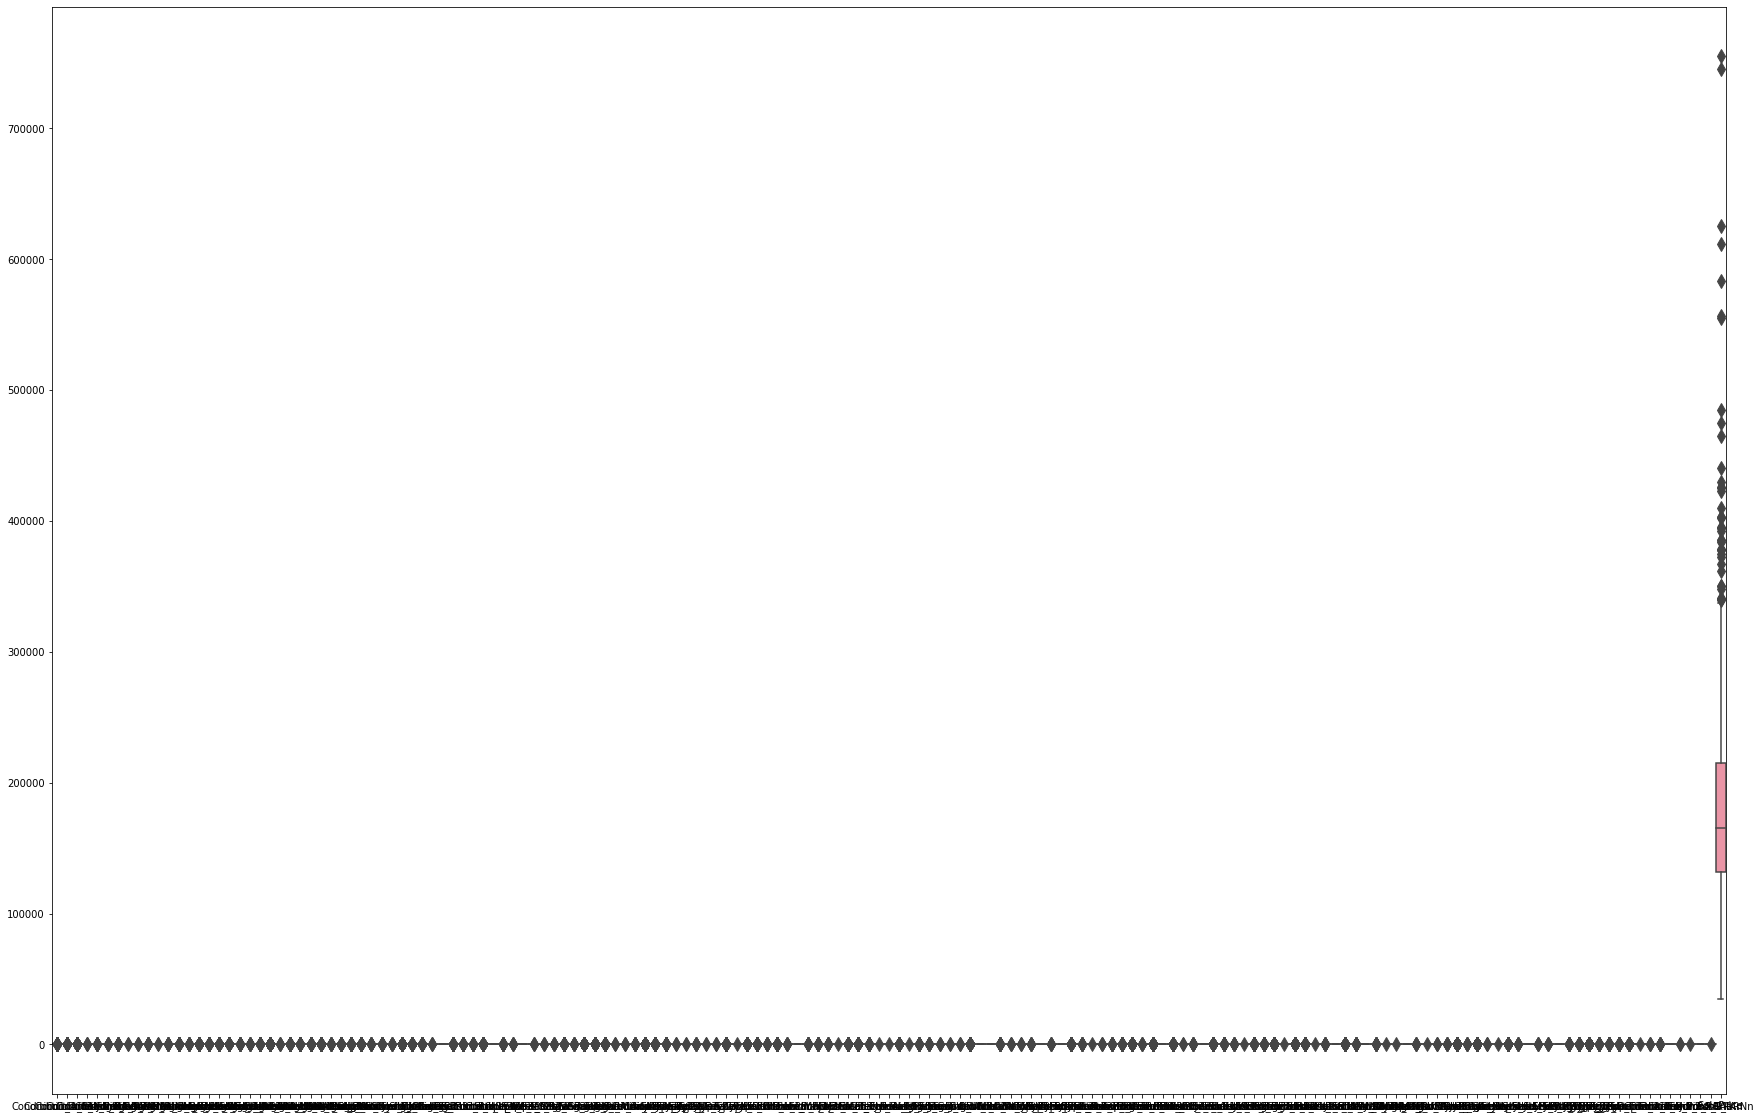

In [873]:
f,ax=plt.subplots(1,1,figsize=(30,20))
sns.boxplot(data=train_pr.iloc[:,80:],fliersize=10,width=1,ax=ax)

In [874]:
list(train_pr.columns)[80:]

['Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotShape_IR1',
 'Lo

In [875]:
train_pr_no=train_pr.copy()

In [876]:
train_pr=train_pr_no.copy()

In [878]:
#list(corr["SalePrice"].sort_values(ascending=False))

In [ ]:
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) >= threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
correlated_features = correlation(train_pr,threshold=0.3)       
len(correlated_features)

In [ ]:
train_pr=train_pr.drop("Utilities",axis=1)

In [ ]:
train_pr["SalePrice"]

In [ ]:
test_pr.shape

In [ ]:
df_num_corr = train_pr.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) >= 0.30].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

In [ ]:
fs=list(golden_features_list.keys())

In [ ]:
Corr_matrix = train_pr[fs].corr()
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(Corr_matrix, annot=True, vmin=-0.5,vmax=1,linewidths=.5, fmt= '.1f',ax=ax, cmap="RdYlGn")

In [883]:
from sklearn.model_selection import train_test_split
X=train_pr.drop("SalePrice",axis=1).values
Y=train_pr["SalePrice"].values
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.05)

In [884]:
#1
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error



params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, Y_train)

mse = mean_squared_error(Y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
import math
print(math.sqrt(mse))


The mean squared error (MSE) on test set: 627645937.8324
25052.86286699445


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[1]	valid_0's rmse: 82165.6	valid_0's l2: 6.75119e+09
[2]	valid_0's rmse: 76865.5	valid_0's l2: 5.90831e+09
[3]	valid_0's rmse: 71828.5	valid_0's l2: 5.15933e+09
[4]	valid_0's rmse: 67602.6	valid_0's l2: 4.57011e+09
[5]	valid_0's rmse: 63541.1	valid_0's l2: 4.03747e+09
[6]	valid_0's rmse: 60085.1	valid_0's l2: 3.61022e+09
[7]	valid_0's rmse: 56934.4	valid_0's l2: 3.24153e+09
[8]	valid_0's rmse: 53684.1	valid_0's l2: 2.88198e+09
[9]	valid_0's rmse: 50833.7	valid_0's l2: 2.58407e+09
[10]	valid_0's rmse: 48340.9	valid_0's l2: 2.33685e+09
[11]	valid_0's rmse: 46036.9	valid_0's l2: 2.1194e+09
[12]	valid_0's rmse: 43946.6	valid_0's l2: 1.9313e+09
[13]	valid_0's rmse: 42044.7	valid_0's l2: 1.76775e+09
[14]	valid_0's rmse: 40366.7	valid_0's l2: 1.62947e+09
[15]	valid_0's rmse: 39093	valid_0's l2: 1.52826e+09
[16]	valid_0's rmse: 37761.8	valid_0's l2: 1.42596e+09
[17]	valid_0's rmse: 36546.3	valid_0's l2: 1.33563e+09
[18]	valid_0's rmse: 35477.8	valid_0's l2: 1.25868e+09
[19]	valid_0's rmse: 34

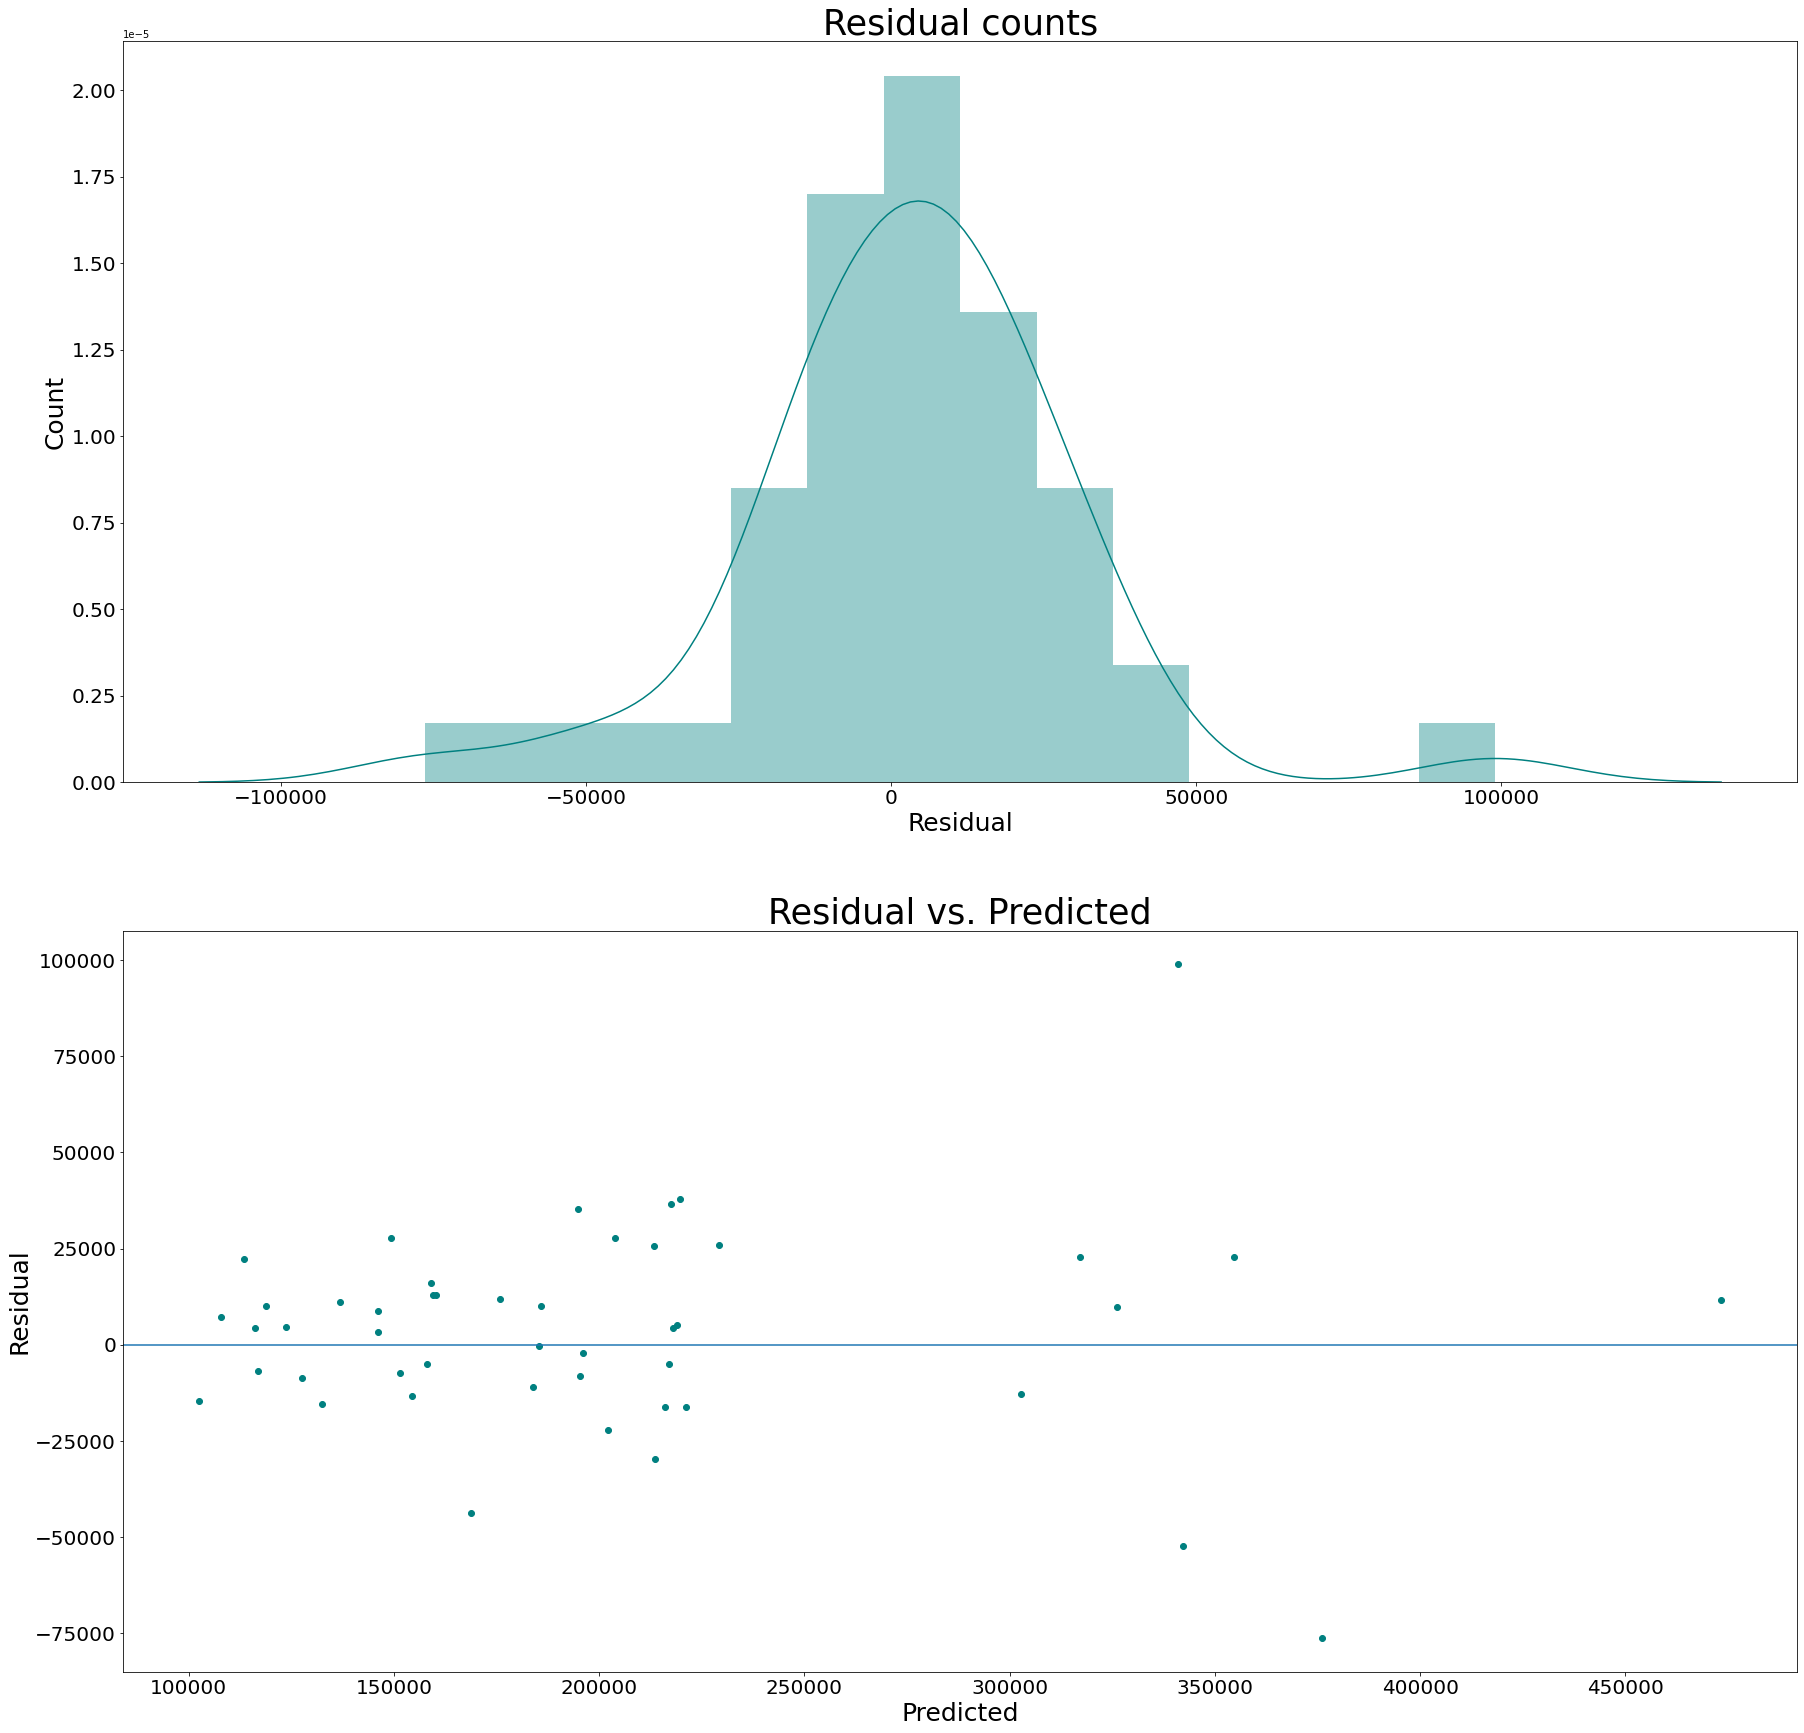

RMSE of LightGBM:
26610.358867415045


In [885]:
#2
from lightgbm import LGBMRegressor as lgb
from sklearn.model_selection import RepeatedKFold,cross_val_score

modelLightGBM = lgb()
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
n_scores = cross_val_score(modelLightGBM, X_train, Y_train, 
                           scoring='neg_mean_absolute_error', 
                           cv=cv, n_jobs=-1, 
                           error_score='raise')

modelLightGBM = lgb(objective='regression', num_leaves=100, learning_rate=0.085, n_estimators=60)
modelLightGBM.fit(X_train, Y_train)

modelLightGBM.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], eval_metric='rmse', early_stopping_rounds=100)

predicted = modelLightGBM.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE of LightGBM:')
print(rmse)

In [886]:
#3
import xgboost
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]
learning_rate = [0.01,0.05, 0.1, 0.15, 0.20,0.40]
min_child_weight = [1, 2, 3, 4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
    }

regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=1, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [887]:
regressor.fit(X_train, Y_train)

[16:52:19] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=1, monotone_constraints='()', n_estimators=900, n_jobs=1,
             nthread=1, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, ...)

[16:52:27] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


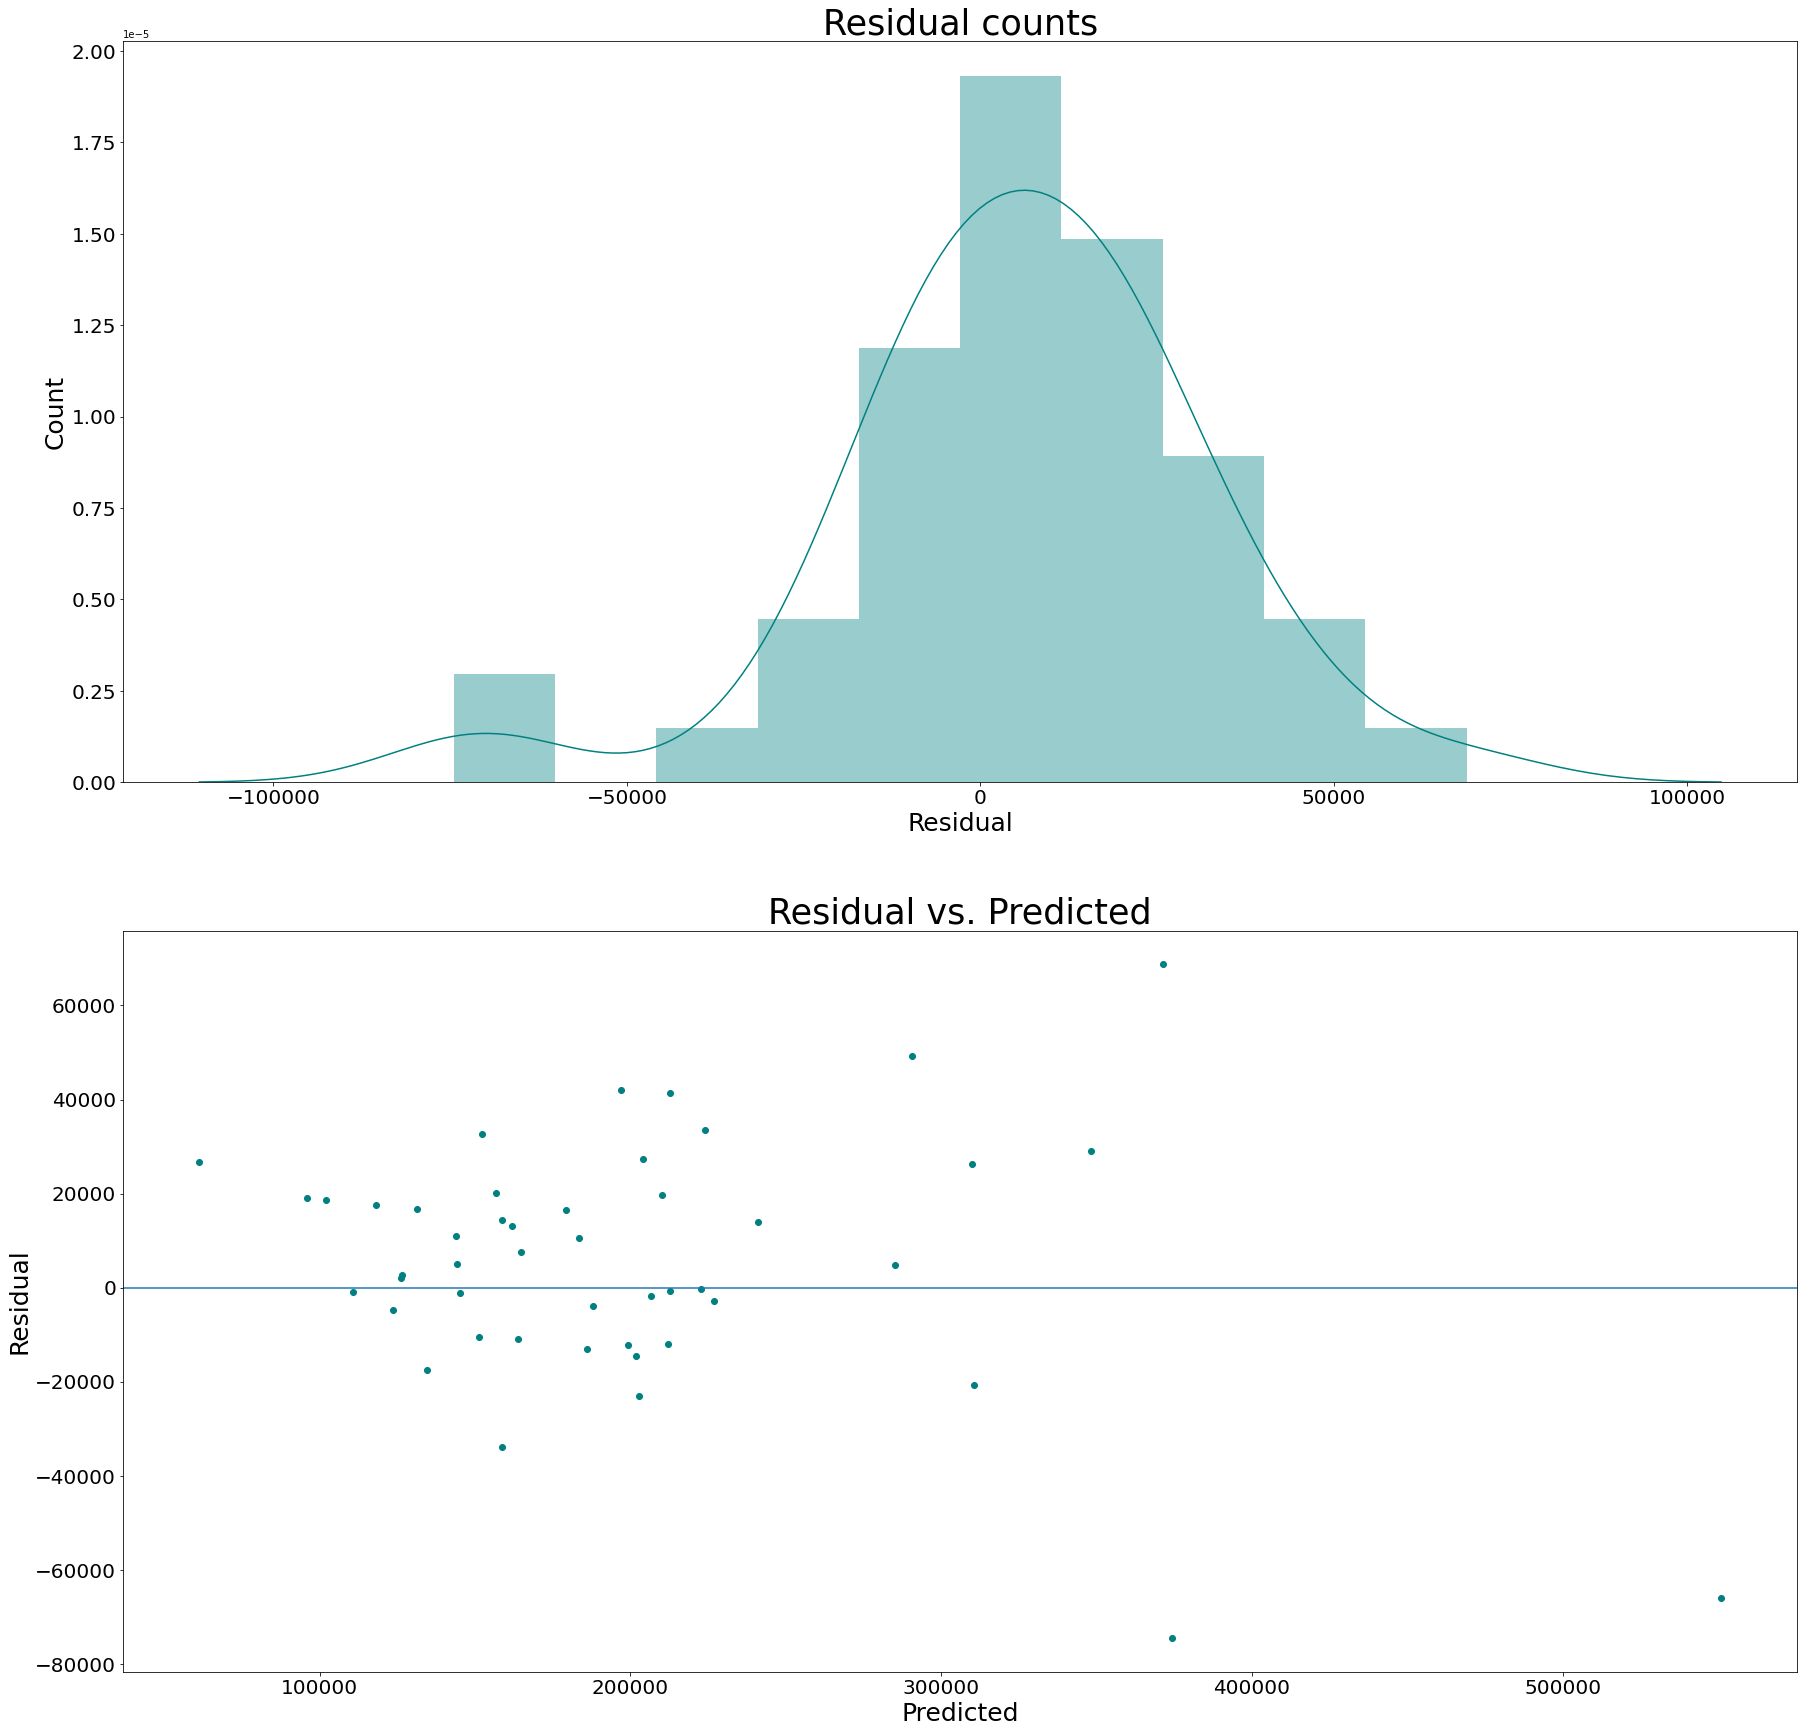

RMSE of XGBoost:
26248.99140717423


In [888]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=1, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
regressor.fit(X_train, Y_train)

predicted = regressor.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE of XGBoost:')
print(rmse)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


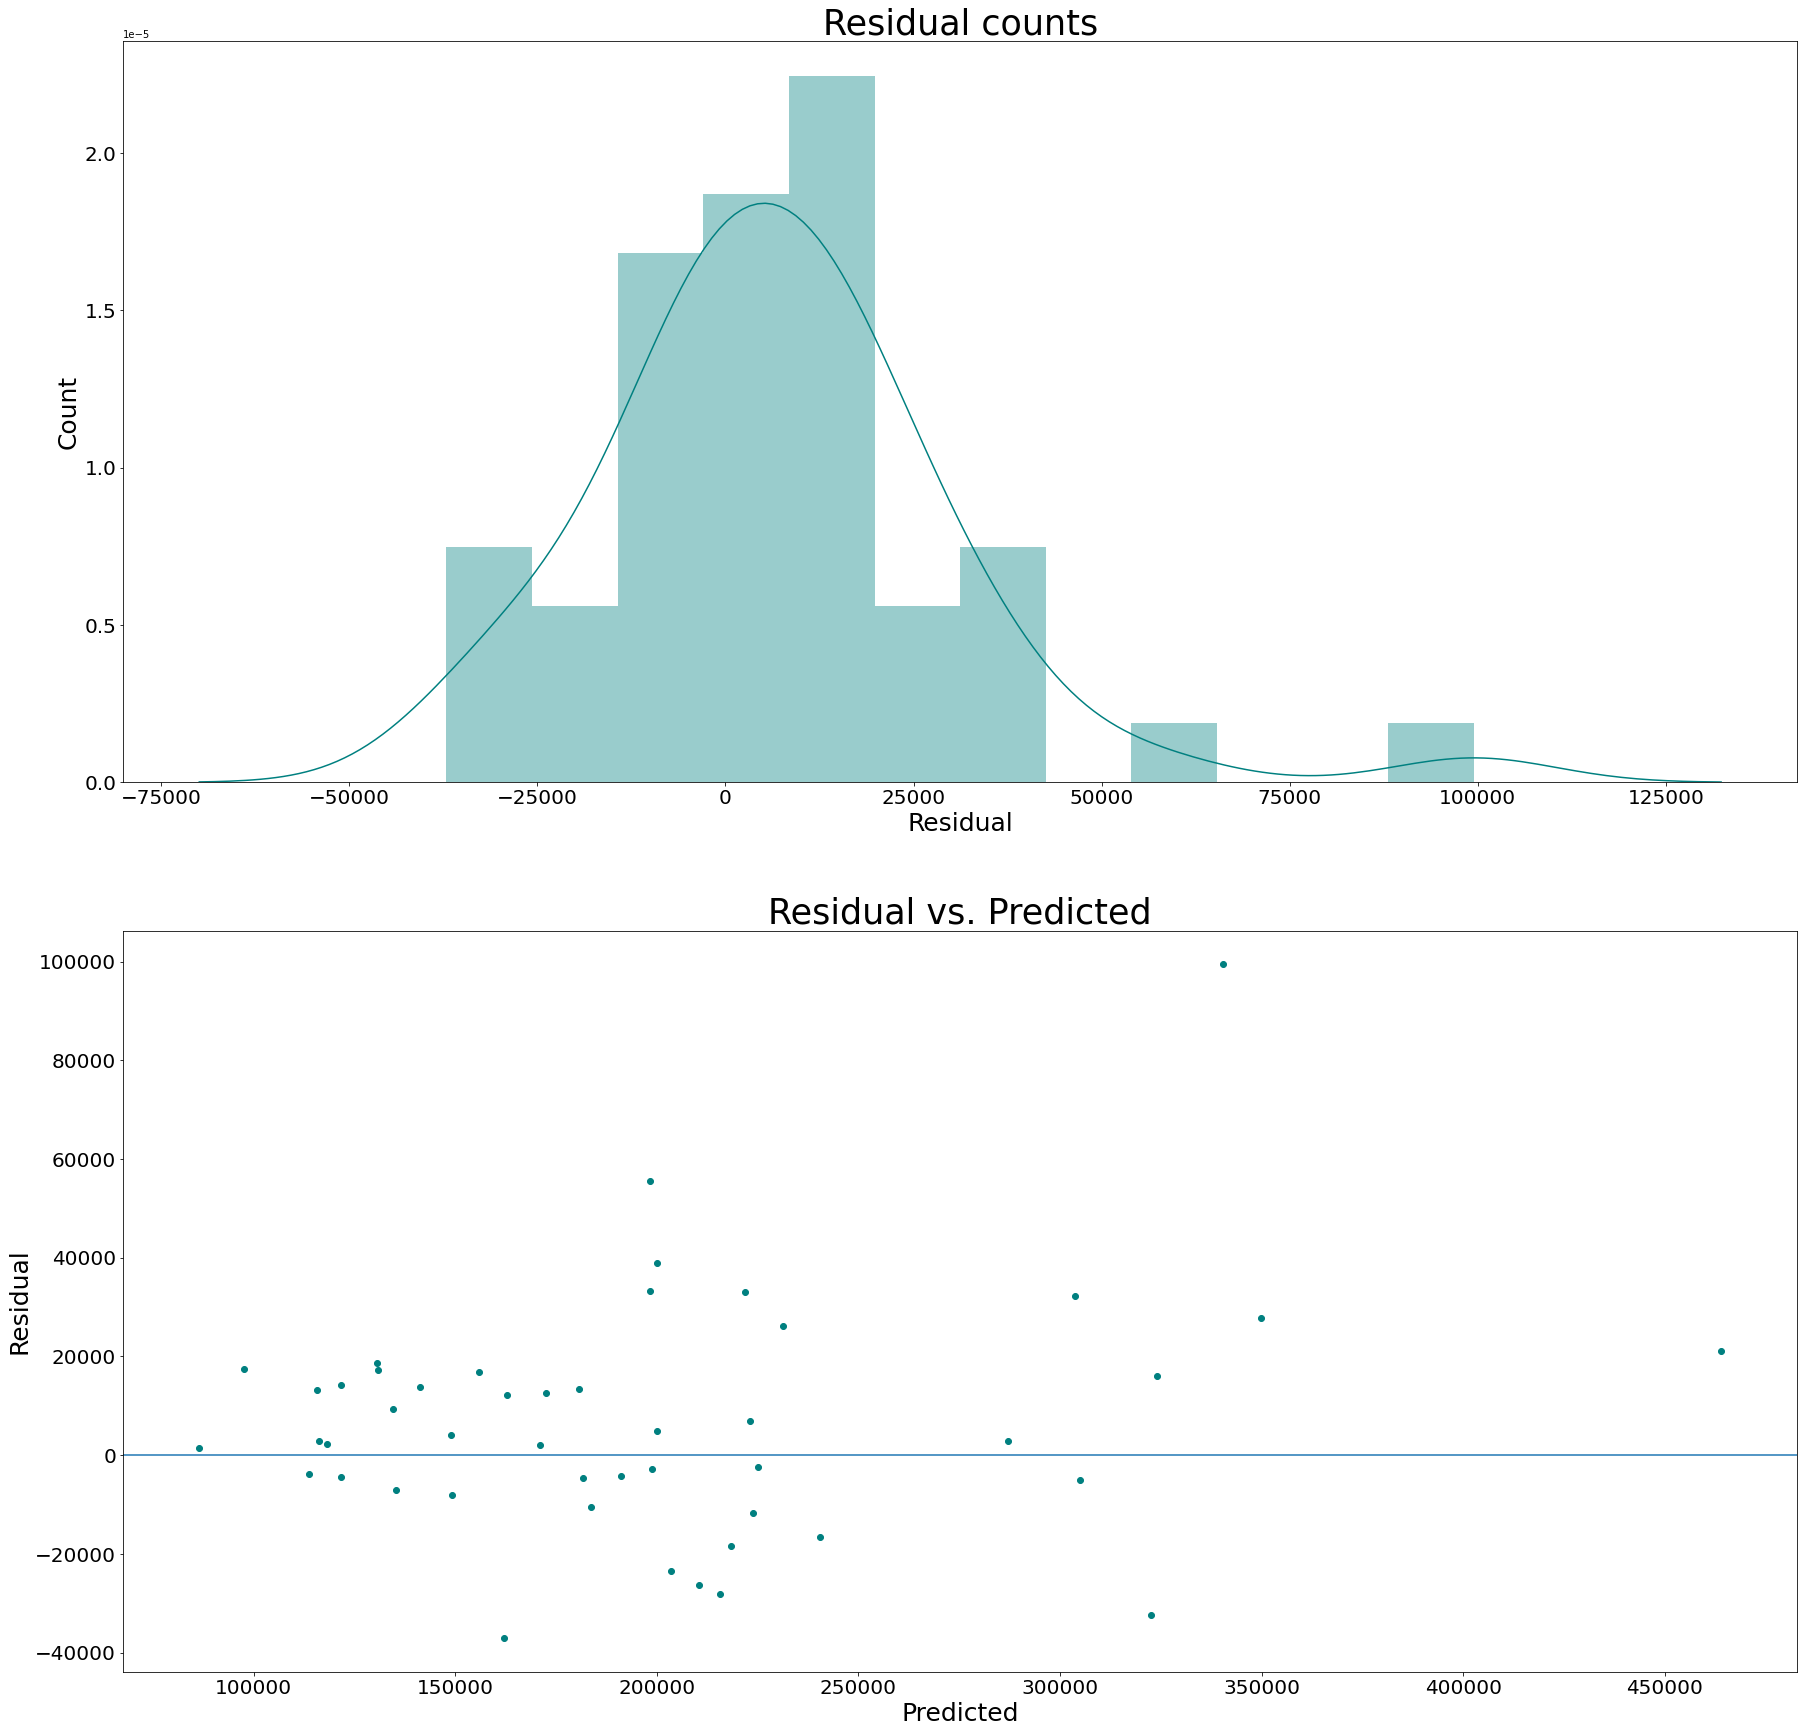

RMSE of CatBoost:
24383.026376421247


In [889]:
#4
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
modelcatBoost = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelcatBoost, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

modelCat = CatBoostRegressor(verbose=0, n_estimators=100)
modelCat.fit(X_train, Y_train)

predicted = modelCat.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE of CatBoost:')
print(rmse)


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


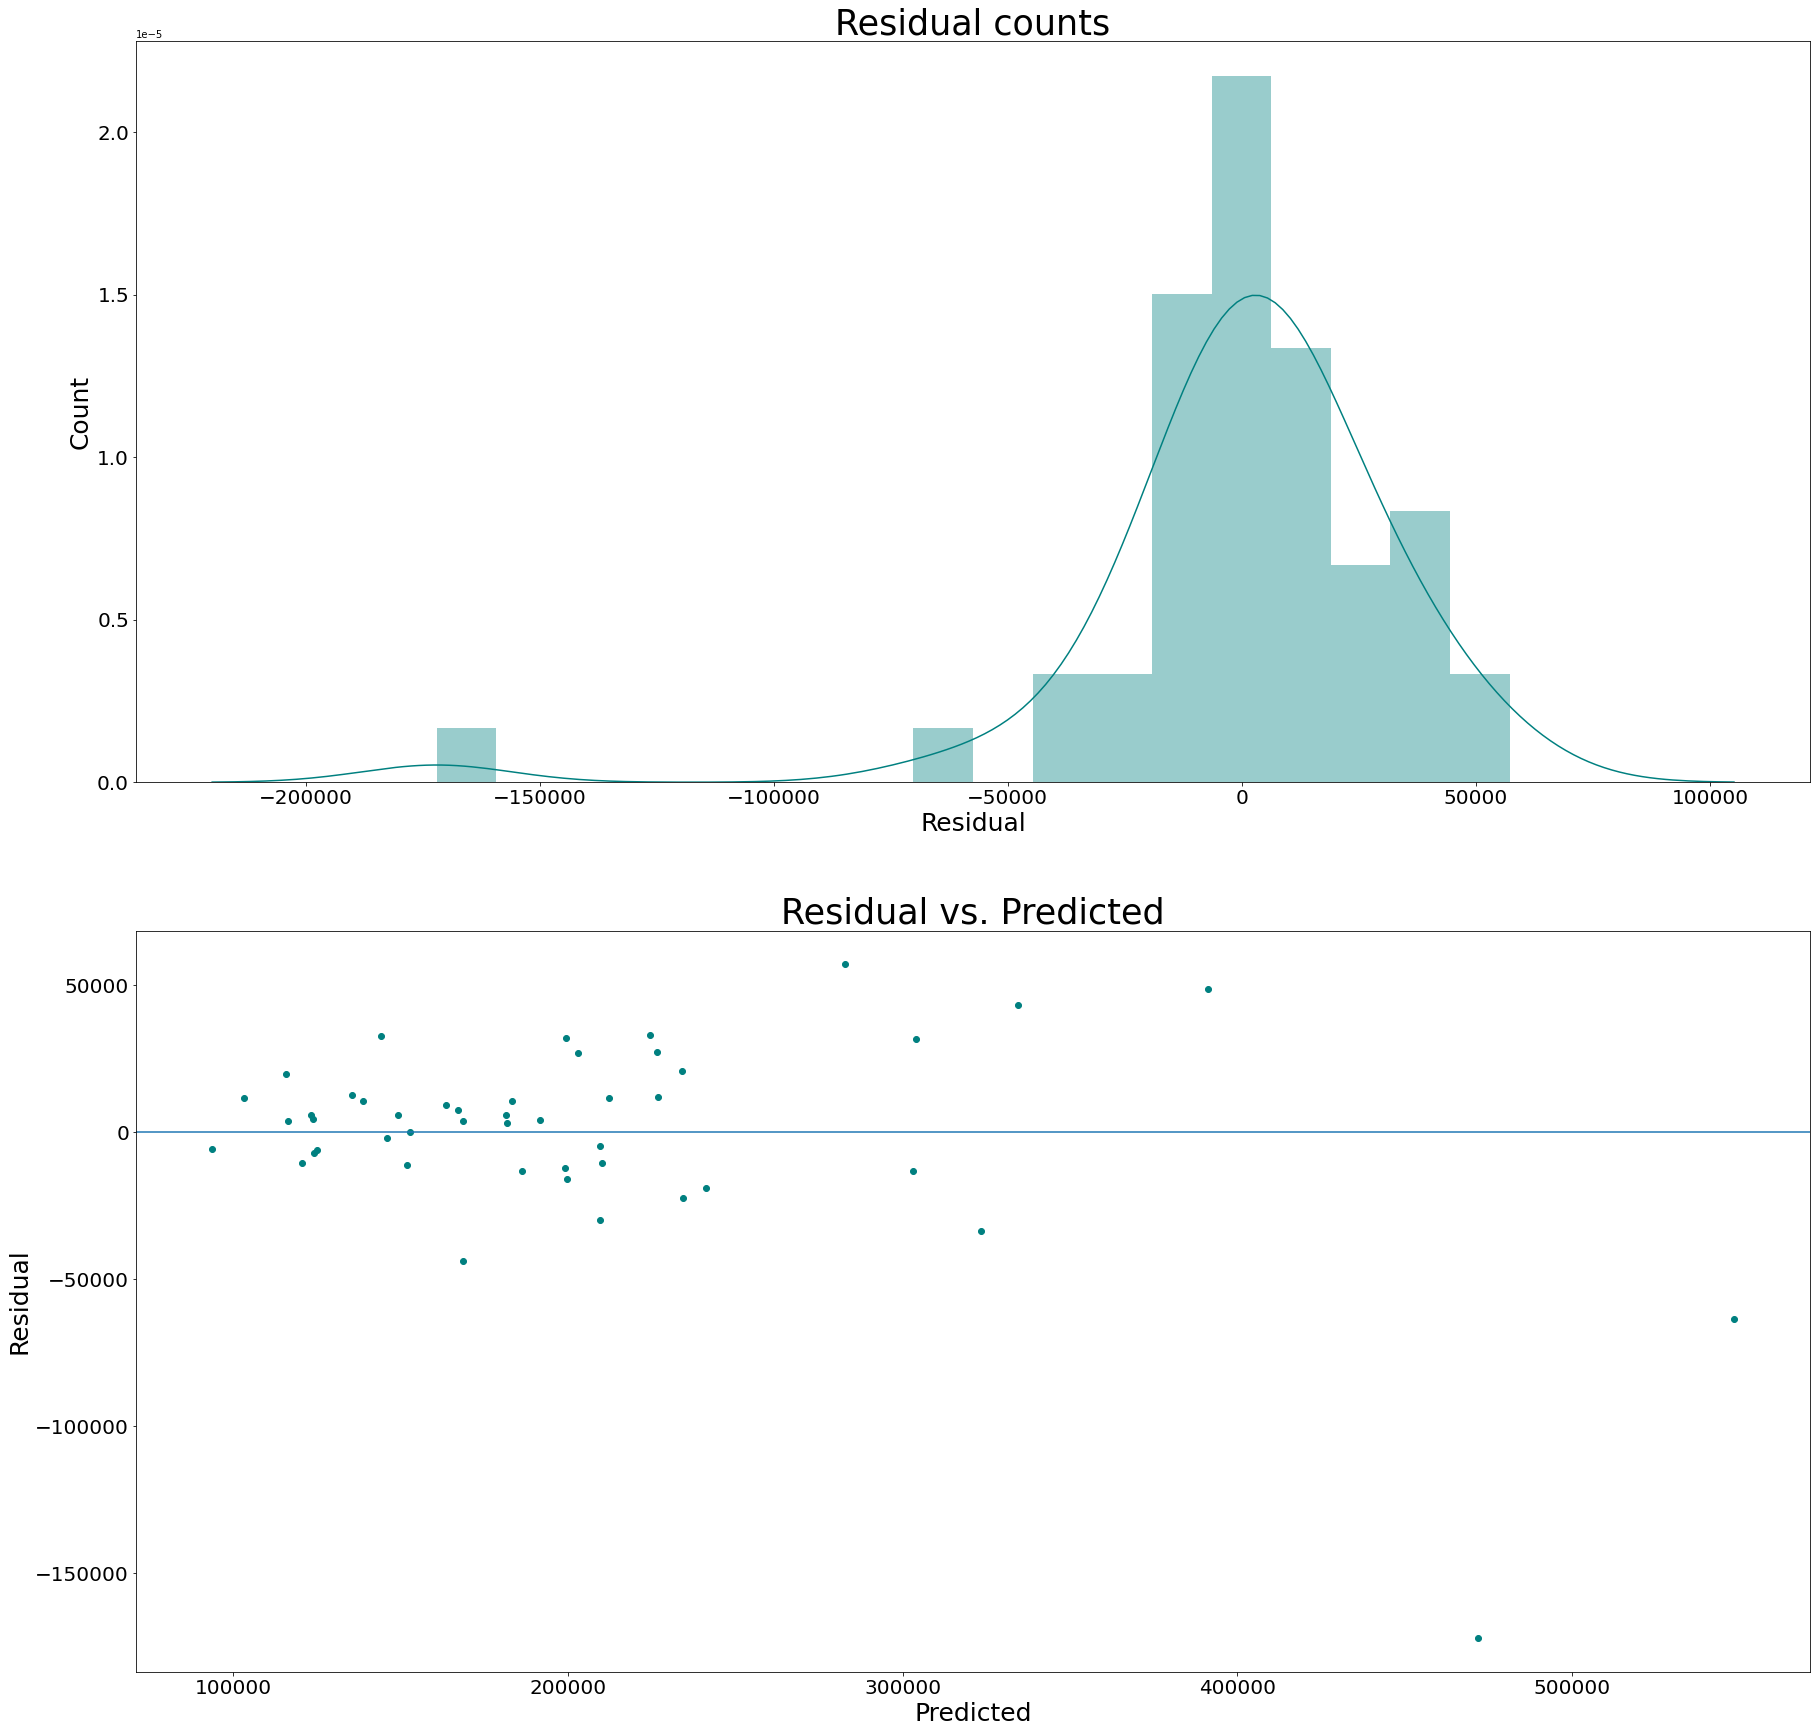


RMSE:
34144.97556597944


In [890]:
#5
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(loss ='ls', max_depth=6)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))


print('\nRMSE:')
print(rmse)